# **Imports**

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Train and Test**

**Train**

In [ ]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    losses = []

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())

    x_values = list(range(1, len(losses) + 1))

    plt.plot(x_values, losses)
    plt.xlabel('Index')
    plt.ylabel('Loss')
    plt.title('Losses')
    plt.show()

**Test**

In [ ]:
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    accuracies.append(100. * correct / len(test_loader.dataset))

# **Testing Different Learning Rate Values (0.5, 0.1, 0.01, 0.001, 0.0001)**

**Define Class (Model with lr = 0.5)**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 21243507.62it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 592341.89it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2001717.35it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2368879.48it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.334543
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.296947
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.307485
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.316551
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.295902
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.301884
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.289977
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.285343
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.311296


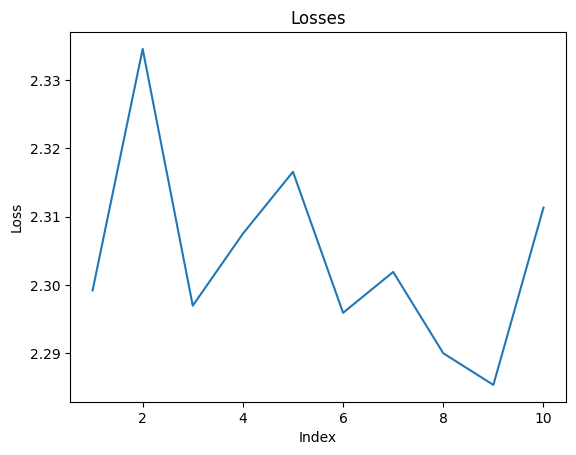


Test set: Average loss: 2.3053, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.323112
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.313079
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.304014
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.310158
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.302013
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.309659
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.301924
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.301650
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.303709
Train Epoch: 2 [57600/60000 (96%)]	Loss: 2.304291


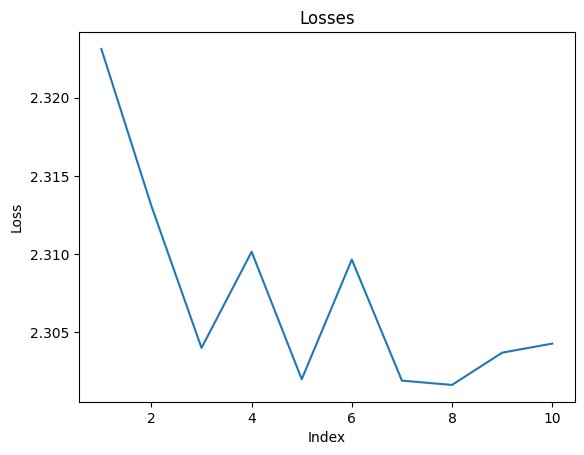


Test set: Average loss: 2.3051, Accuracy: 1028/10000 (10%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.271179
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.313536
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.294547
Train Epoch: 3 [19200/60000 (32%)]	Loss: 2.288120
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.307604
Train Epoch: 3 [32000/60000 (53%)]	Loss: 2.306774
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.313006
Train Epoch: 3 [44800/60000 (75%)]	Loss: 2.297039
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.331030
Train Epoch: 3 [57600/60000 (96%)]	Loss: 2.329631


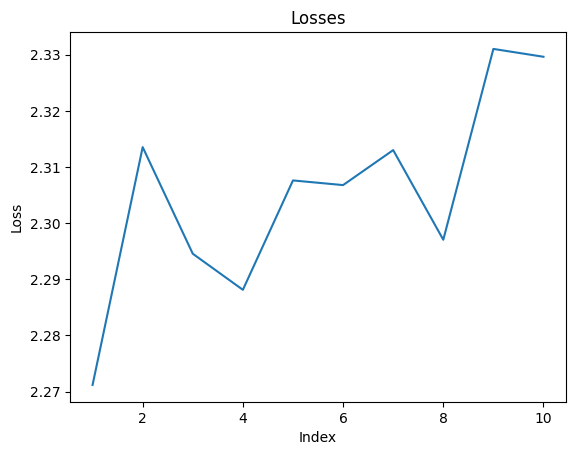


Test set: Average loss: 2.3048, Accuracy: 980/10000 (10%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.290251
Train Epoch: 4 [6400/60000 (11%)]	Loss: 2.335367
Train Epoch: 4 [12800/60000 (21%)]	Loss: 2.292016
Train Epoch: 4 [19200/60000 (32%)]	Loss: 2.304239
Train Epoch: 4 [25600/60000 (43%)]	Loss: 2.306312
Train Epoch: 4 [32000/60000 (53%)]	Loss: 2.283666
Train Epoch: 4 [38400/60000 (64%)]	Loss: 2.314497
Train Epoch: 4 [44800/60000 (75%)]	Loss: 2.320207
Train Epoch: 4 [51200/60000 (85%)]	Loss: 2.315666
Train Epoch: 4 [57600/60000 (96%)]	Loss: 2.308042


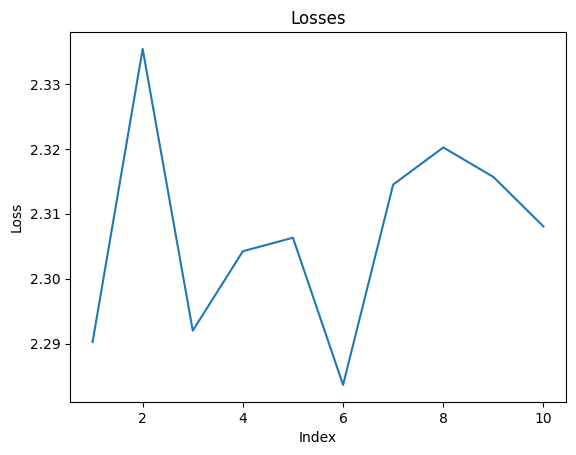


Test set: Average loss: 2.3027, Accuracy: 1135/10000 (11%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 2.308690
Train Epoch: 5 [6400/60000 (11%)]	Loss: 2.293355
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.299553
Train Epoch: 5 [19200/60000 (32%)]	Loss: 2.308179
Train Epoch: 5 [25600/60000 (43%)]	Loss: 2.306103
Train Epoch: 5 [32000/60000 (53%)]	Loss: 2.302241
Train Epoch: 5 [38400/60000 (64%)]	Loss: 2.305386
Train Epoch: 5 [44800/60000 (75%)]	Loss: 2.317199
Train Epoch: 5 [51200/60000 (85%)]	Loss: 2.296138
Train Epoch: 5 [57600/60000 (96%)]	Loss: 2.315088


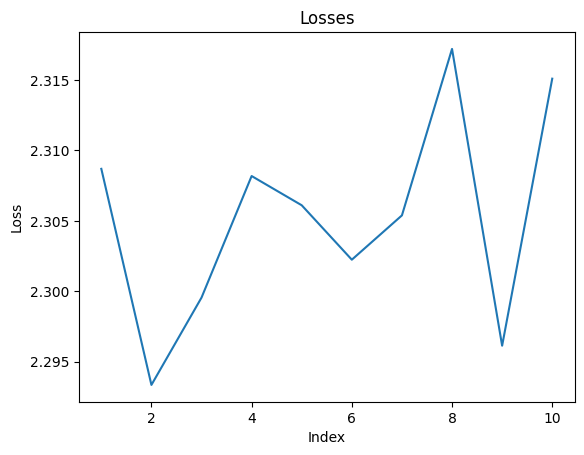


Test set: Average loss: 2.3025, Accuracy: 1135/10000 (11%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 2.304949
Train Epoch: 6 [6400/60000 (11%)]	Loss: 2.312366
Train Epoch: 6 [12800/60000 (21%)]	Loss: 2.310977
Train Epoch: 6 [19200/60000 (32%)]	Loss: 2.290761
Train Epoch: 6 [25600/60000 (43%)]	Loss: 2.304391
Train Epoch: 6 [32000/60000 (53%)]	Loss: 2.319972
Train Epoch: 6 [38400/60000 (64%)]	Loss: 2.320290
Train Epoch: 6 [44800/60000 (75%)]	Loss: 2.320833
Train Epoch: 6 [51200/60000 (85%)]	Loss: 2.312569
Train Epoch: 6 [57600/60000 (96%)]	Loss: 2.292890


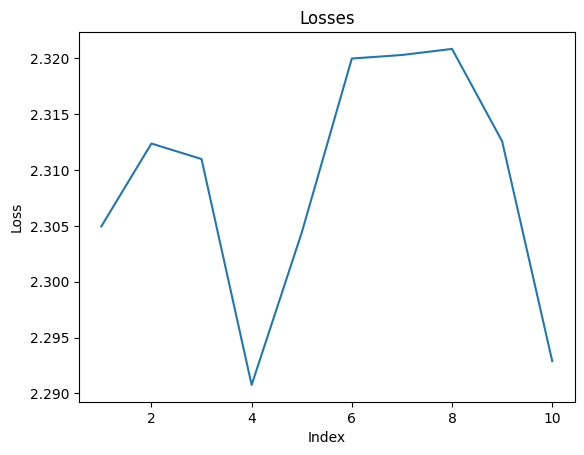


Test set: Average loss: 2.3070, Accuracy: 1009/10000 (10%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 2.288553
Train Epoch: 7 [6400/60000 (11%)]	Loss: 2.305353
Train Epoch: 7 [12800/60000 (21%)]	Loss: 2.289025
Train Epoch: 7 [19200/60000 (32%)]	Loss: 2.284635
Train Epoch: 7 [25600/60000 (43%)]	Loss: 2.304343
Train Epoch: 7 [32000/60000 (53%)]	Loss: 2.301473
Train Epoch: 7 [38400/60000 (64%)]	Loss: 2.320802
Train Epoch: 7 [44800/60000 (75%)]	Loss: 2.308655
Train Epoch: 7 [51200/60000 (85%)]	Loss: 2.303860
Train Epoch: 7 [57600/60000 (96%)]	Loss: 2.306174


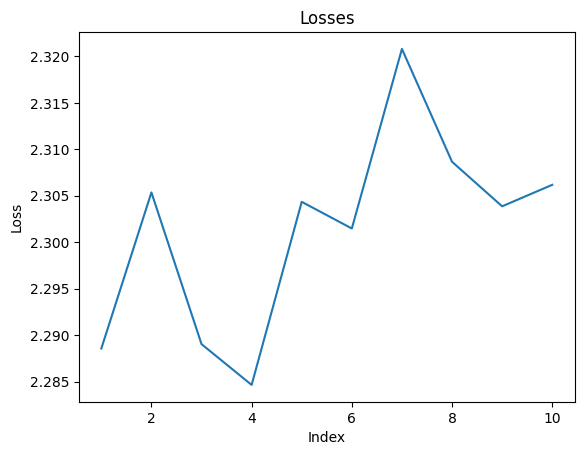


Test set: Average loss: 2.3032, Accuracy: 1028/10000 (10%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 2.319308
Train Epoch: 8 [6400/60000 (11%)]	Loss: 2.300525
Train Epoch: 8 [12800/60000 (21%)]	Loss: 2.313494
Train Epoch: 8 [19200/60000 (32%)]	Loss: 2.292850
Train Epoch: 8 [25600/60000 (43%)]	Loss: 2.334823
Train Epoch: 8 [32000/60000 (53%)]	Loss: 2.312021
Train Epoch: 8 [38400/60000 (64%)]	Loss: 2.297591
Train Epoch: 8 [44800/60000 (75%)]	Loss: 2.295411
Train Epoch: 8 [51200/60000 (85%)]	Loss: 2.295969
Train Epoch: 8 [57600/60000 (96%)]	Loss: 2.242850


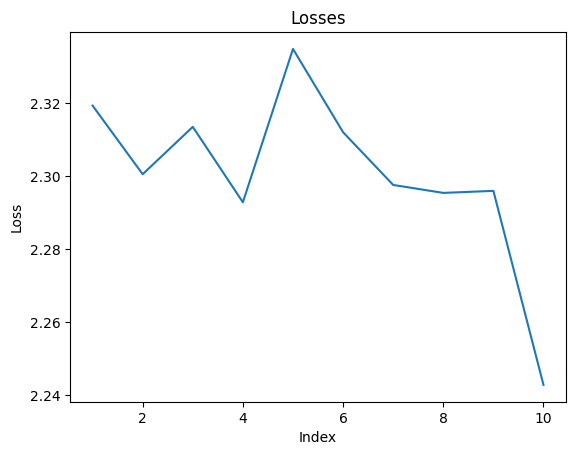


Test set: Average loss: 2.3051, Accuracy: 1009/10000 (10%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 2.293807
Train Epoch: 9 [6400/60000 (11%)]	Loss: 2.310898
Train Epoch: 9 [12800/60000 (21%)]	Loss: 2.295592
Train Epoch: 9 [19200/60000 (32%)]	Loss: 2.305537
Train Epoch: 9 [25600/60000 (43%)]	Loss: 2.318362
Train Epoch: 9 [32000/60000 (53%)]	Loss: 2.298949
Train Epoch: 9 [38400/60000 (64%)]	Loss: 2.303219
Train Epoch: 9 [44800/60000 (75%)]	Loss: 2.281829
Train Epoch: 9 [51200/60000 (85%)]	Loss: 2.299913
Train Epoch: 9 [57600/60000 (96%)]	Loss: 2.308021


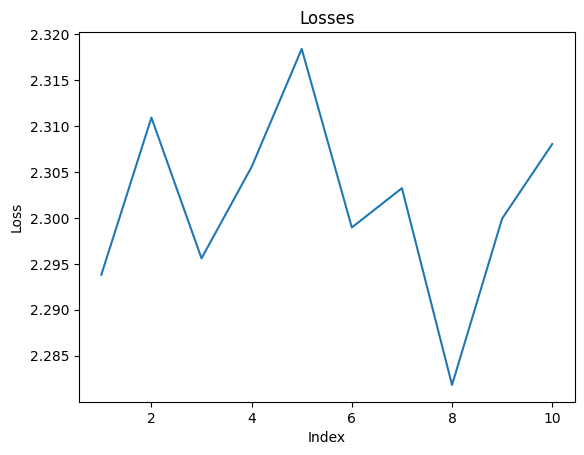


Test set: Average loss: 2.3031, Accuracy: 1135/10000 (11%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 2.305196
Train Epoch: 10 [6400/60000 (11%)]	Loss: 2.309235
Train Epoch: 10 [12800/60000 (21%)]	Loss: 2.293785
Train Epoch: 10 [19200/60000 (32%)]	Loss: 2.296479
Train Epoch: 10 [25600/60000 (43%)]	Loss: 2.308918
Train Epoch: 10 [32000/60000 (53%)]	Loss: 2.302161
Train Epoch: 10 [38400/60000 (64%)]	Loss: 2.299647
Train Epoch: 10 [44800/60000 (75%)]	Loss: 2.302661
Train Epoch: 10 [51200/60000 (85%)]	Loss: 2.298092
Train Epoch: 10 [57600/60000 (96%)]	Loss: 2.315447


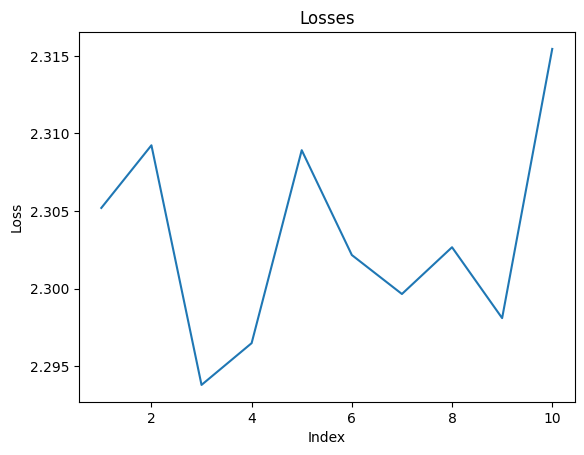


Test set: Average loss: 2.3070, Accuracy: 1135/10000 (11%)



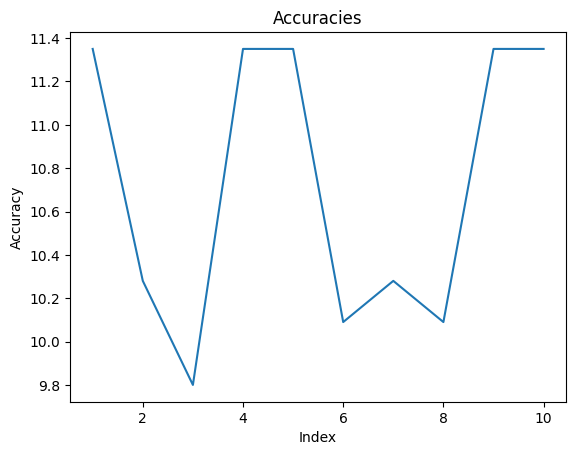

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.5, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.5_lr.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with lr = 0.1)**

In [ ]:
class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.309346
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.103347
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.119995
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.120706
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.074733
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.102519
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.022056
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.071018
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.011610


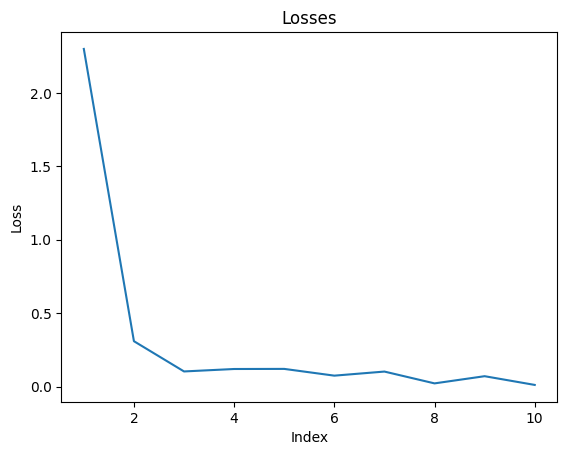


Test set: Average loss: 0.0574, Accuracy: 9817/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.074507
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.016122
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.048858
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.004535
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.001730
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.132585
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.062653
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.037644
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.078608
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.061287


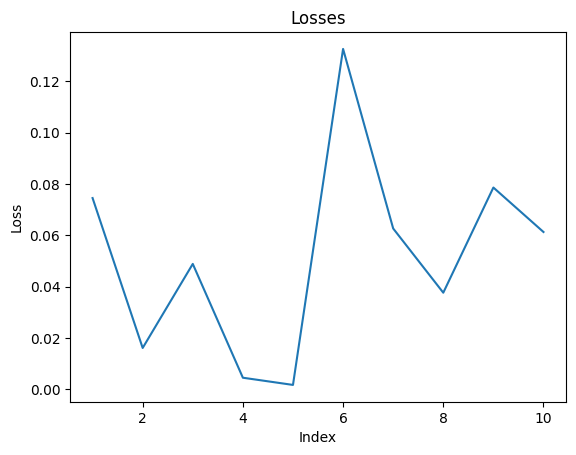


Test set: Average loss: 0.0307, Accuracy: 9887/10000 (99%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.005300
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.055019
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.026469
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.046949
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.009195
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.006038
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.035772
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.001678
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.060279
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.110187


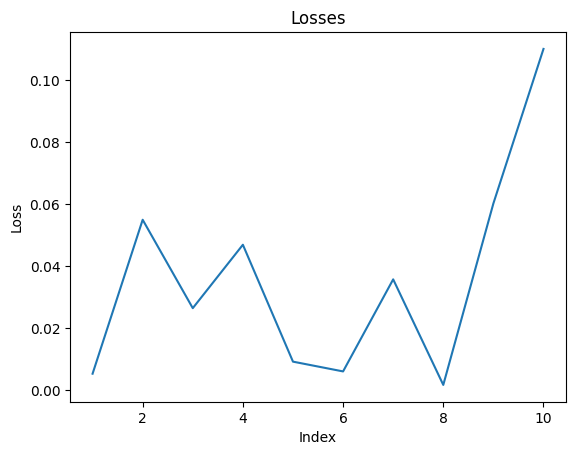


Test set: Average loss: 0.0320, Accuracy: 9895/10000 (99%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.004934
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.001114
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.029520
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.001163
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.003561
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.001159
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.041429
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.002419
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.059304
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.000925


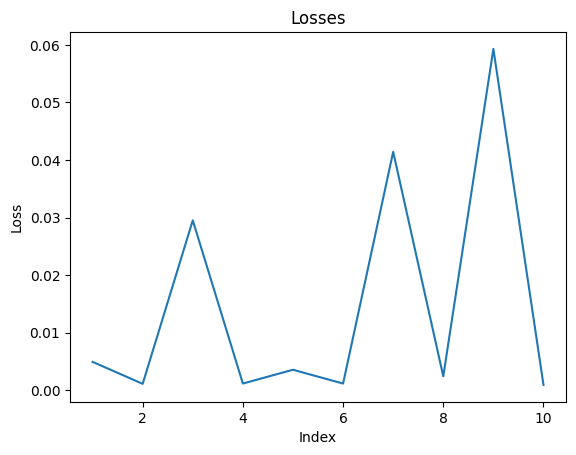


Test set: Average loss: 0.0261, Accuracy: 9919/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.004418
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.001844
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.003053
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.004892
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.001787
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.010434
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.004738
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.002607
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.003505
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.016253


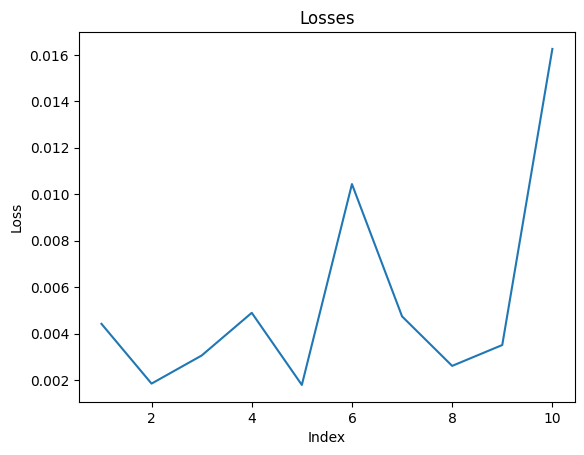


Test set: Average loss: 0.0266, Accuracy: 9923/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.016109
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.001455
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.023149
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.001583
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.000276
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.000410
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.003287
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.003429
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.011962
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.026113


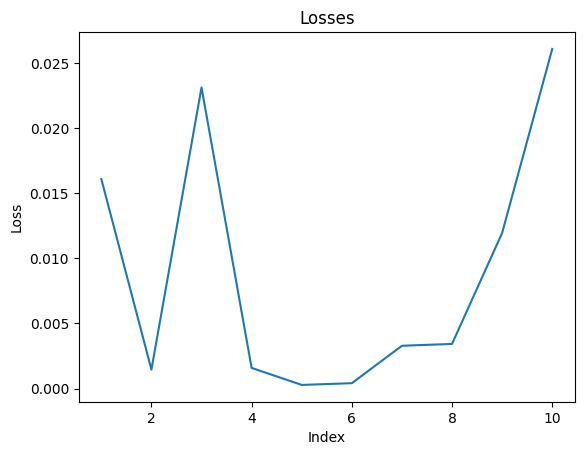


Test set: Average loss: 0.0311, Accuracy: 9899/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.003395
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.001891
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.001525
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.021595
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.000041
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.008060
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.002282
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.000050
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.007253
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.001190


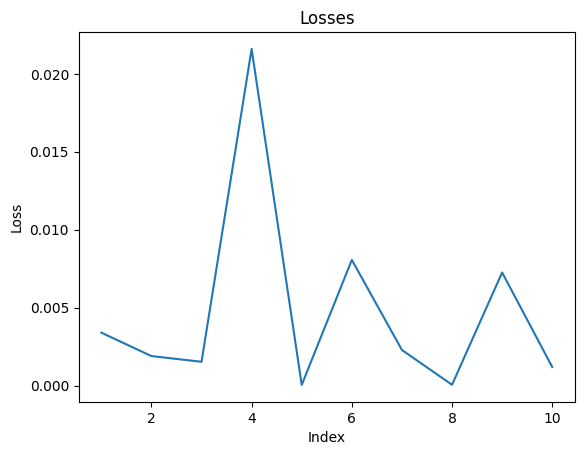


Test set: Average loss: 0.0261, Accuracy: 9921/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.000345
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.030027
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.000844
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.004247
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.001509
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.000011
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.000233
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.015164
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.000034
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.027163


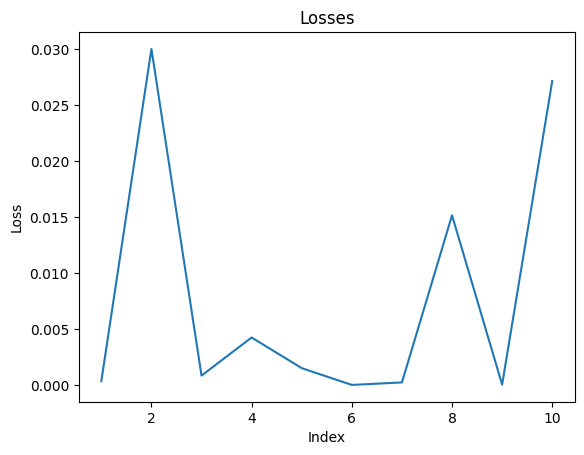


Test set: Average loss: 0.0343, Accuracy: 9908/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.000032
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.000491
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.000493
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.000009
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.012304
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.000271
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.000099
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.000850
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.009121
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.000098


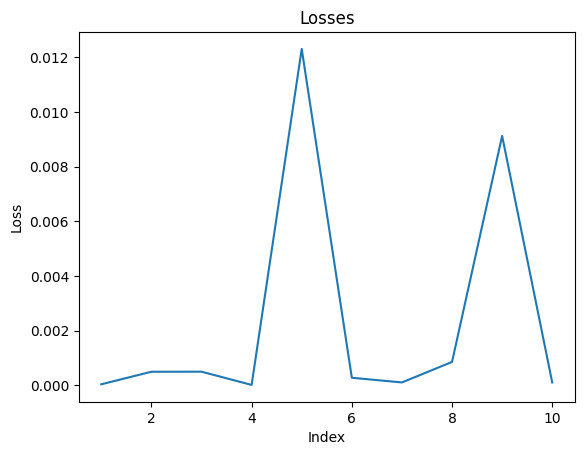


Test set: Average loss: 0.0293, Accuracy: 9924/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.000376
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.000180
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.000119
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.000064
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.000854
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.007610
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.000113
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.000219
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.013398
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.000193


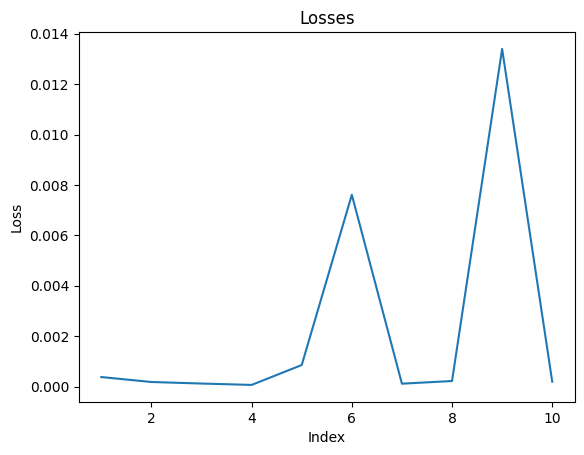


Test set: Average loss: 0.0277, Accuracy: 9929/10000 (99%)



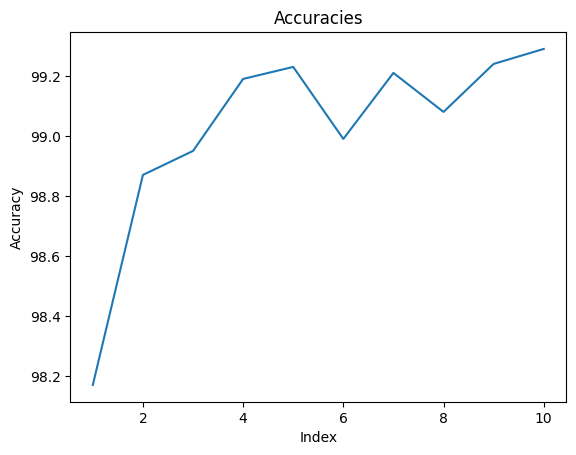

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.1, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_2().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.1_lr.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with lr = 0.01)**

In [ ]:
class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.498190
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.308307
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.308880
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.234635
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.154788
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.268853
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.091637
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.172958
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.048436


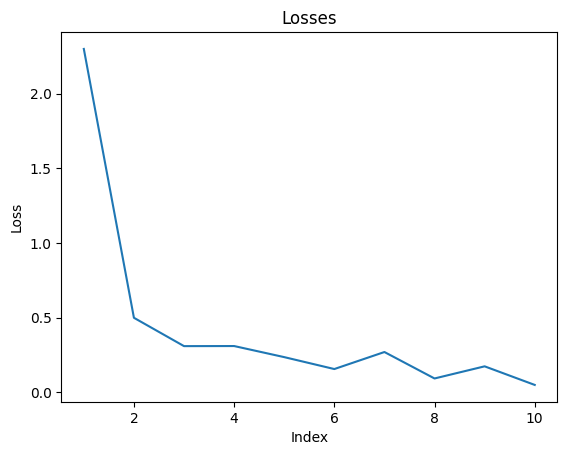


Test set: Average loss: 0.1055, Accuracy: 9678/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.211610
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.059556
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.078691
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.090970
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.093833
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.165407
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.085918
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.079712
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.052998
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.059833


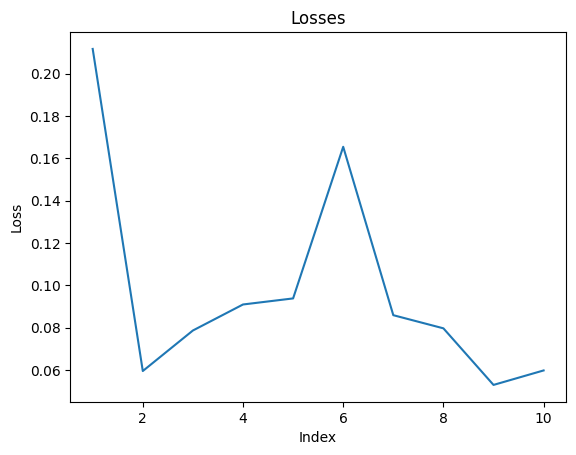


Test set: Average loss: 0.0681, Accuracy: 9781/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.025927
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.074539
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.219866
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.218020
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.009661
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.067735
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.154292
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.029568
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.036099
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.072321


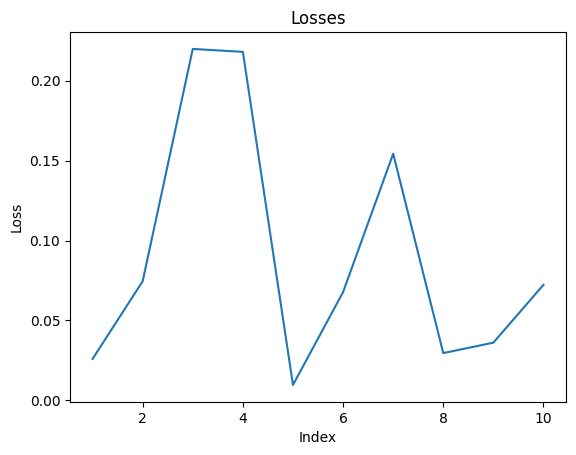


Test set: Average loss: 0.0480, Accuracy: 9838/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.021525
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.025582
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.081811
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.008626
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.061560
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.028641
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.040269
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.070938
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.057505
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014340


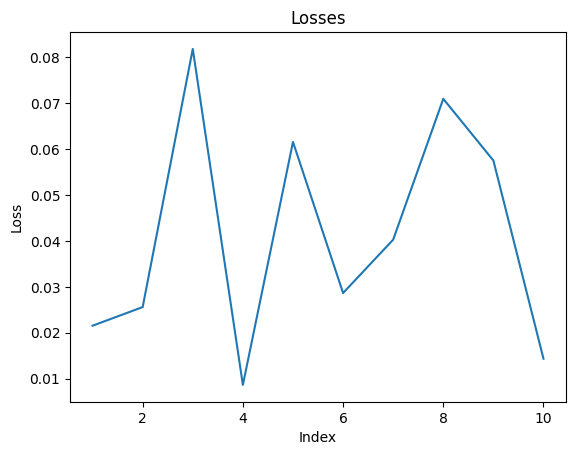


Test set: Average loss: 0.0414, Accuracy: 9860/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.092466
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.094951
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.041601
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.039228
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.034719
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.036642
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.042592
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.035509
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.013031
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.040271


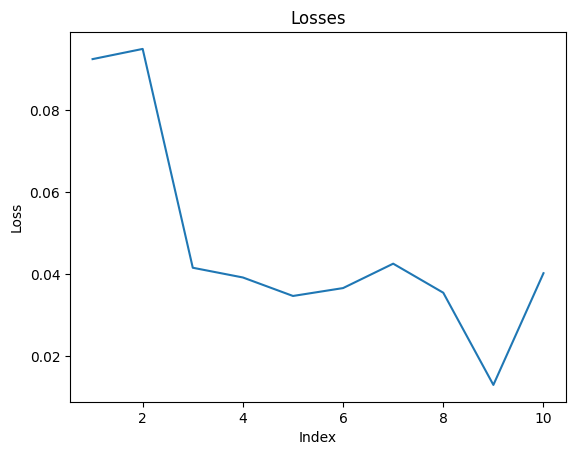


Test set: Average loss: 0.0366, Accuracy: 9877/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.076414
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.002526
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.048873
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.018404
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.009991
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.014872
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.056215
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.033248
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.022839
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.063831


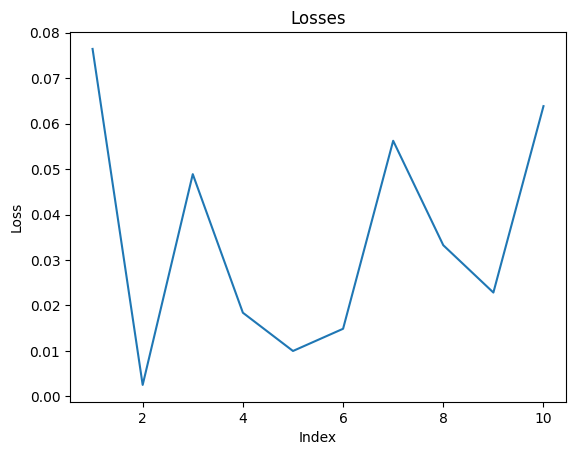


Test set: Average loss: 0.0388, Accuracy: 9877/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.013075
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.093874
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.042093
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.036262
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.005887
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.023955
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.024747
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.005138
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.039066
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.015814


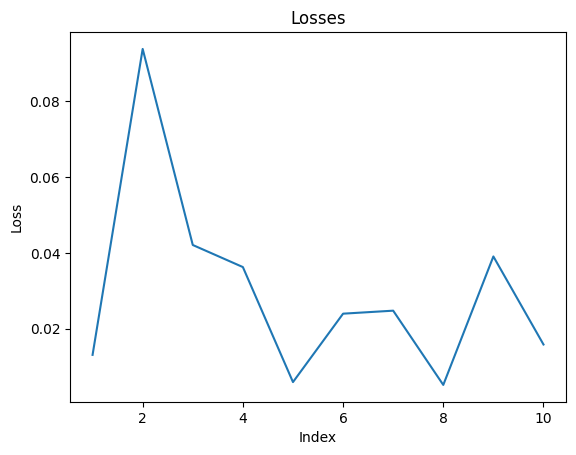


Test set: Average loss: 0.0345, Accuracy: 9886/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.036956
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.027858
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.003999
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.023722
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.039568
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.002984
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.001599
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.054956
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.006720
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.066412


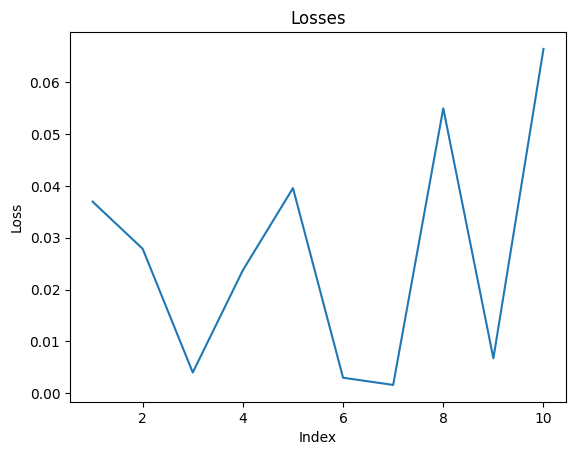


Test set: Average loss: 0.0437, Accuracy: 9849/10000 (98%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.008603
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.007170
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.007113
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.002781
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.009506
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.026617
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.010236
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.082196
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.019118
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.002419


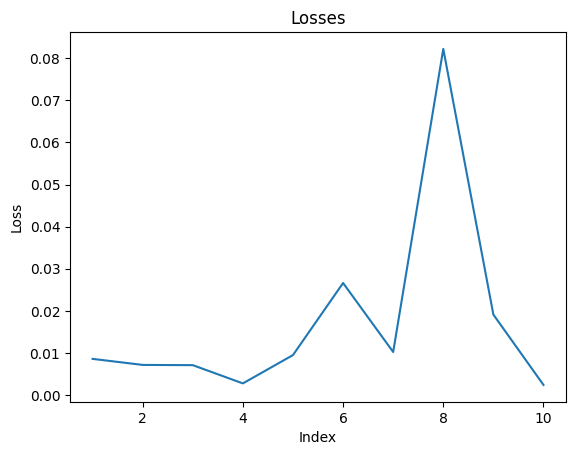


Test set: Average loss: 0.0293, Accuracy: 9908/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.008307
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.004239
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.007579
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.015908
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.099486
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.048477
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.005898
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.029219
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.032101
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.011405


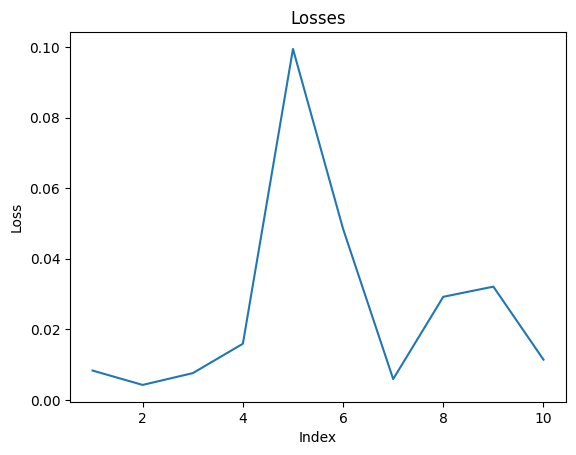


Test set: Average loss: 0.0331, Accuracy: 9891/10000 (99%)



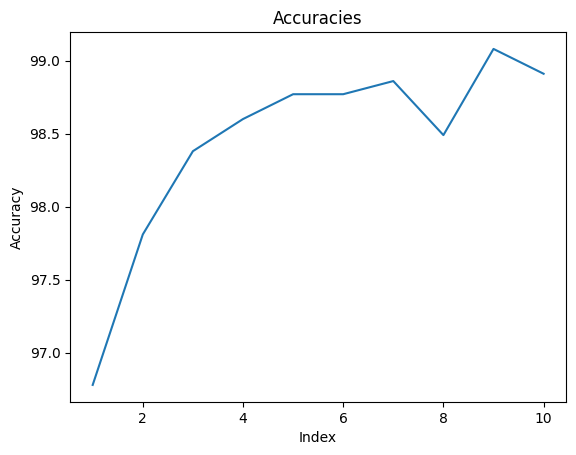

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_3().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.01_lr.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with lr = 0.001)**

In [ ]:
class Net_4(nn.Module):
    def __init__(self):
        super(Net_4, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.233123
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.125055
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.954077
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.746445
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.242988
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.026402
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.617780
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.717791
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.412013


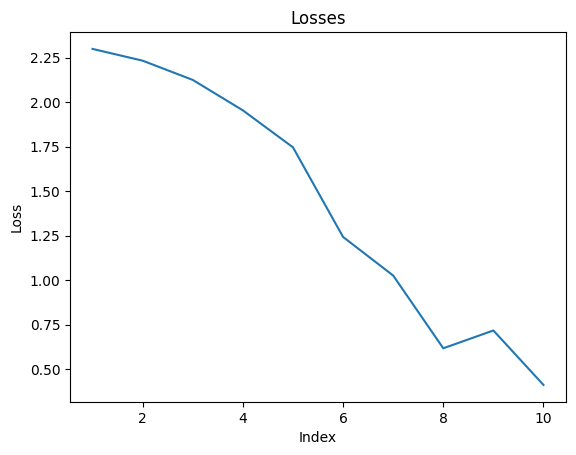


Test set: Average loss: 0.4822, Accuracy: 8670/10000 (87%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.718412
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.433090
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.361724
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.419112
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.372069
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.486474
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.337924
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.441633
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.308023
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.358167


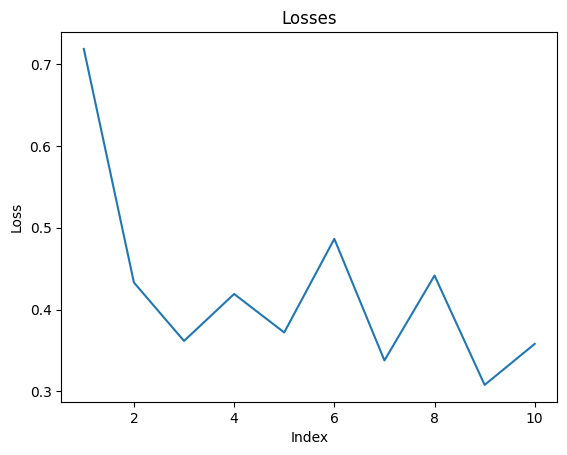


Test set: Average loss: 0.3068, Accuracy: 9059/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.310351
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.316008
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.535344
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.515262
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.190005
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.252503
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.248735
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.189269
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.169844
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.395453


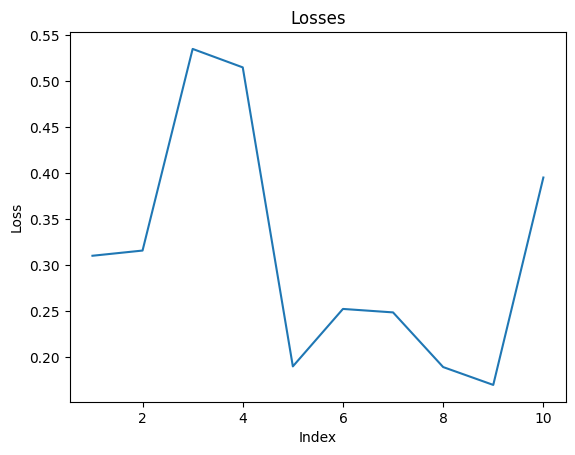


Test set: Average loss: 0.2258, Accuracy: 9336/10000 (93%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.225243
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.181587
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.328197
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.116486
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.206624
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.161116
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.149602
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.213463
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.153023
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.061625


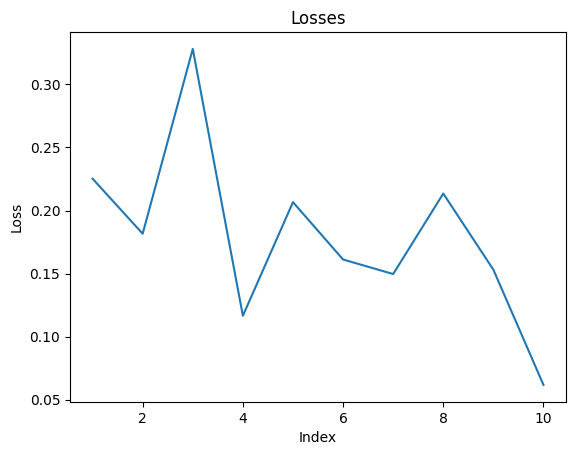


Test set: Average loss: 0.1901, Accuracy: 9456/10000 (95%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.154738
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.209530
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.317787
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.245969
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.097625
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.163829
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.191825
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.334461
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.090228
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.183669


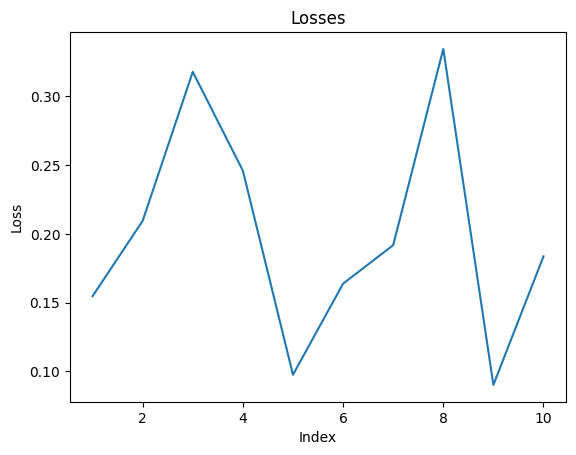


Test set: Average loss: 0.1553, Accuracy: 9553/10000 (96%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.175417
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.094074
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.227847
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.244181
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.096827
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.134717
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.150542
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.221446
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.075434
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.070997


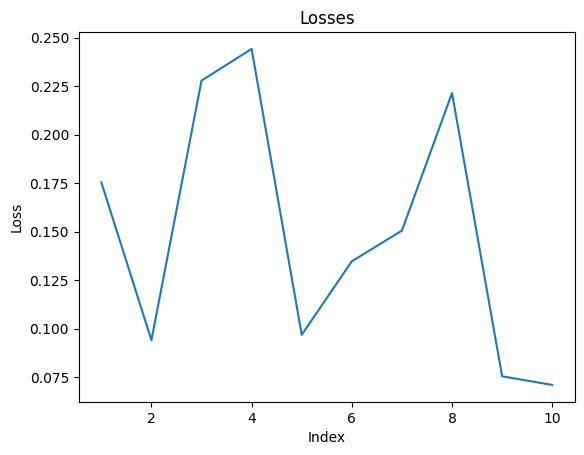


Test set: Average loss: 0.1346, Accuracy: 9605/10000 (96%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.133409
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.241518
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.106179
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.104959
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.113338
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.125890
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.256423
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.174838
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.105247
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.079163


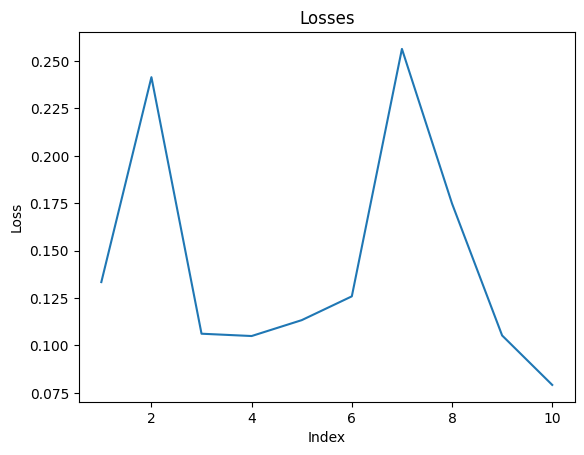


Test set: Average loss: 0.1141, Accuracy: 9674/10000 (97%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.039435
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.077205
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.076585
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.085943
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.229812
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.087342
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.067162
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.110669
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.064710
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.068886


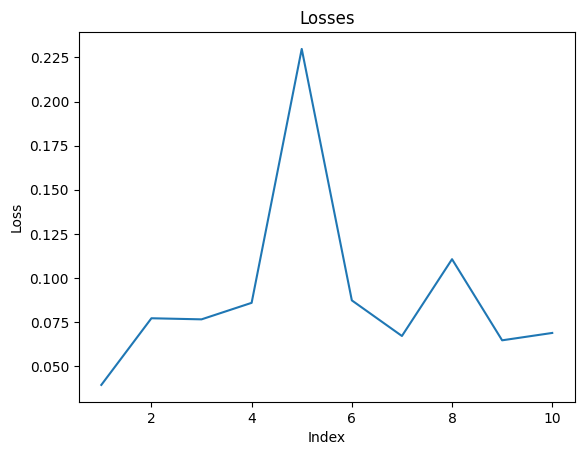


Test set: Average loss: 0.1114, Accuracy: 9678/10000 (97%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.079537
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.117047
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.096199
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.082237
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.116700
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.103655
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.176381
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.217058
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.056189
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.071971


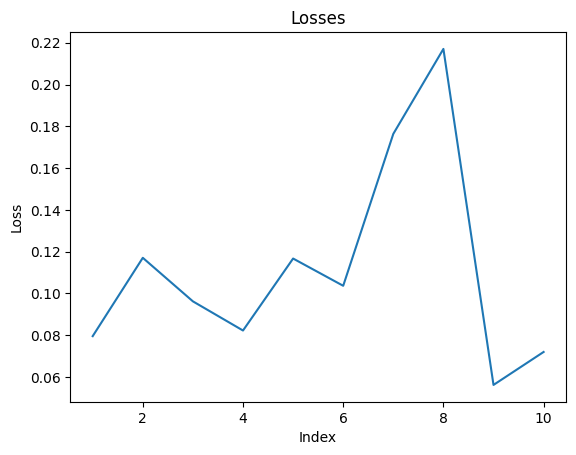


Test set: Average loss: 0.0977, Accuracy: 9723/10000 (97%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.067844
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.072496
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.081371
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.068407
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.242963
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.122904
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.066449
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.120403
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.113869
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.121501


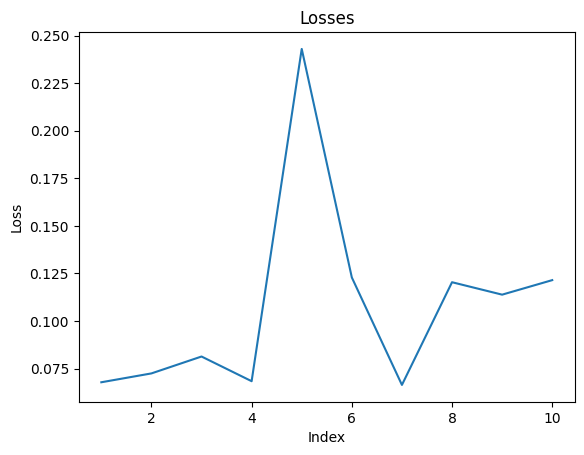


Test set: Average loss: 0.0879, Accuracy: 9749/10000 (97%)



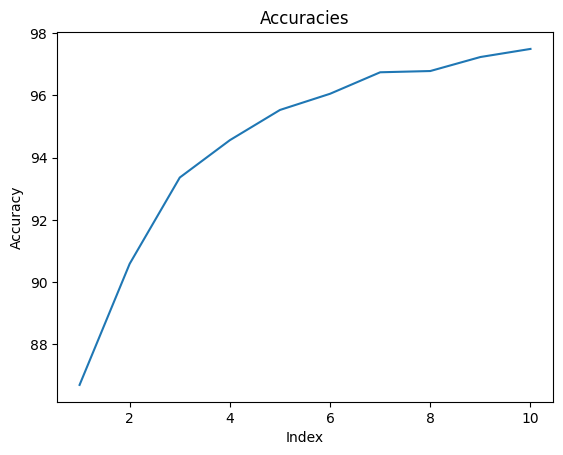

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.001, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_4().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.001_lr.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with lr = 0.0001)**

In [ ]:
class Net_5(nn.Module):
    def __init__(self):
        super(Net_5, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.287946
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.273426
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.285515
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.285261
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.262120
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.270304
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.263140
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.243814
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.249143


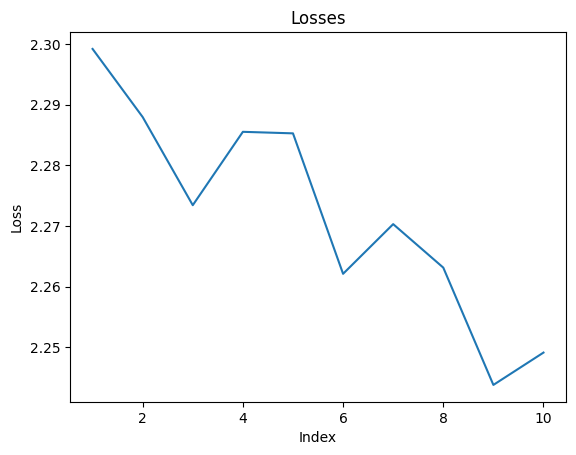


Test set: Average loss: 2.2352, Accuracy: 4071/10000 (41%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.230361
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.229223
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.207520
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.215754
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.195158
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.205511
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.193208
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.161325
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.148498
Train Epoch: 2 [57600/60000 (96%)]	Loss: 2.161571


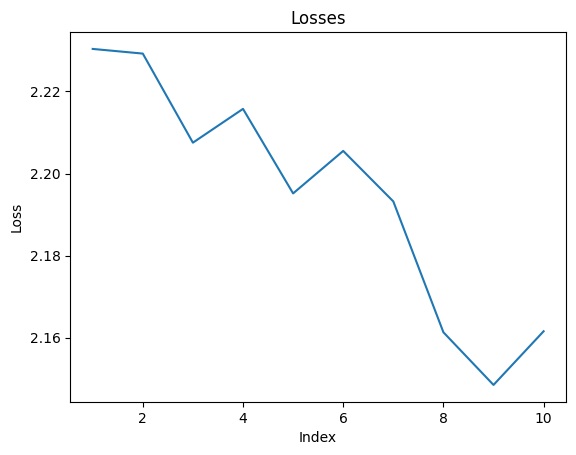


Test set: Average loss: 2.1427, Accuracy: 5891/10000 (59%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.134063
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.132572
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.107448
Train Epoch: 3 [19200/60000 (32%)]	Loss: 2.125366
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.064579
Train Epoch: 3 [32000/60000 (53%)]	Loss: 2.064054
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.066802
Train Epoch: 3 [44800/60000 (75%)]	Loss: 2.009121
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.058692
Train Epoch: 3 [57600/60000 (96%)]	Loss: 2.027894


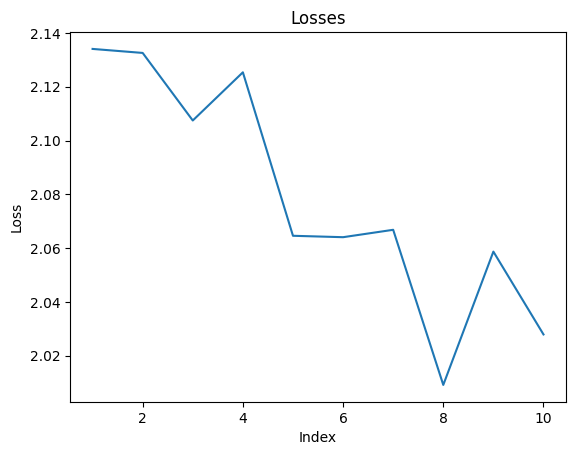


Test set: Average loss: 1.9840, Accuracy: 6421/10000 (64%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.983064
Train Epoch: 4 [6400/60000 (11%)]	Loss: 2.002874
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.952739
Train Epoch: 4 [19200/60000 (32%)]	Loss: 1.904907
Train Epoch: 4 [25600/60000 (43%)]	Loss: 1.845574
Train Epoch: 4 [32000/60000 (53%)]	Loss: 1.888476
Train Epoch: 4 [38400/60000 (64%)]	Loss: 1.843916
Train Epoch: 4 [44800/60000 (75%)]	Loss: 1.802170
Train Epoch: 4 [51200/60000 (85%)]	Loss: 1.735788
Train Epoch: 4 [57600/60000 (96%)]	Loss: 1.667019


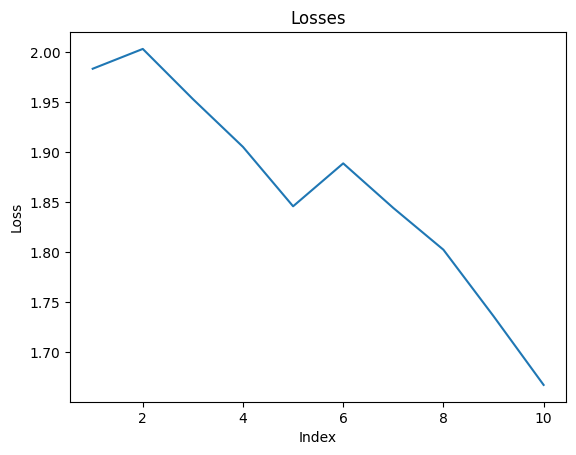


Test set: Average loss: 1.7006, Accuracy: 6921/10000 (69%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 1.686969
Train Epoch: 5 [6400/60000 (11%)]	Loss: 1.612979
Train Epoch: 5 [12800/60000 (21%)]	Loss: 1.614489
Train Epoch: 5 [19200/60000 (32%)]	Loss: 1.722891
Train Epoch: 5 [25600/60000 (43%)]	Loss: 1.560741
Train Epoch: 5 [32000/60000 (53%)]	Loss: 1.540389
Train Epoch: 5 [38400/60000 (64%)]	Loss: 1.510633
Train Epoch: 5 [44800/60000 (75%)]	Loss: 1.439492
Train Epoch: 5 [51200/60000 (85%)]	Loss: 1.431569
Train Epoch: 5 [57600/60000 (96%)]	Loss: 1.402807


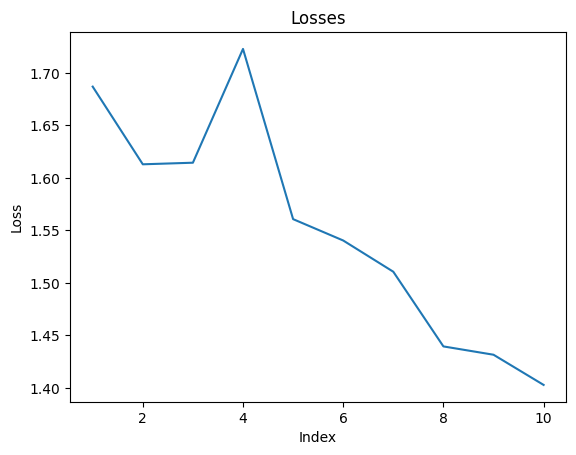


Test set: Average loss: 1.3081, Accuracy: 7480/10000 (75%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 1.356741
Train Epoch: 6 [6400/60000 (11%)]	Loss: 1.419688
Train Epoch: 6 [12800/60000 (21%)]	Loss: 1.211977
Train Epoch: 6 [19200/60000 (32%)]	Loss: 1.162189
Train Epoch: 6 [25600/60000 (43%)]	Loss: 1.146328
Train Epoch: 6 [32000/60000 (53%)]	Loss: 1.117689
Train Epoch: 6 [38400/60000 (64%)]	Loss: 1.048338
Train Epoch: 6 [44800/60000 (75%)]	Loss: 1.165524
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.994173
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.862335


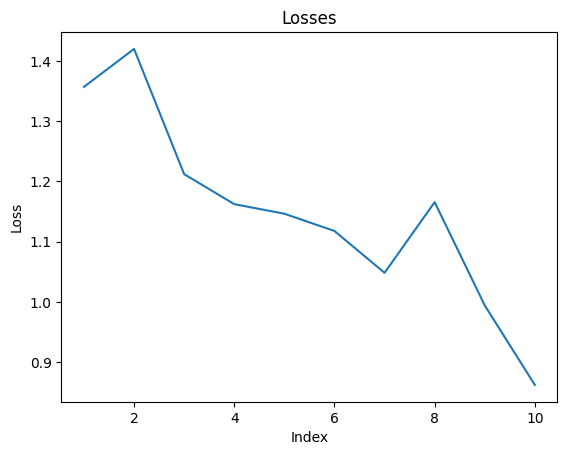


Test set: Average loss: 0.9577, Accuracy: 7921/10000 (79%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.993274
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.918461
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.916416
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.906750
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.810065
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.765479
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.941034
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.753903
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.781044
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.683132


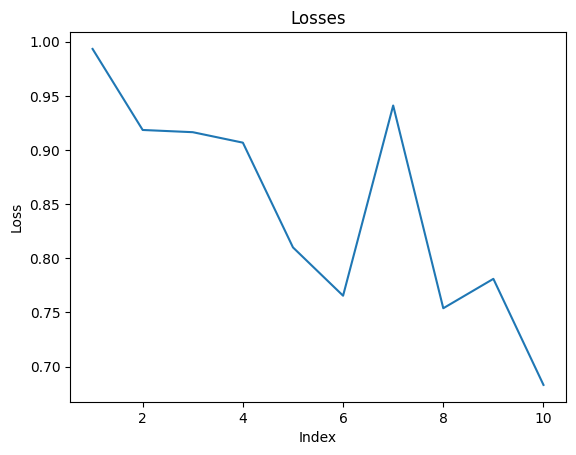


Test set: Average loss: 0.7369, Accuracy: 8184/10000 (82%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.604749
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.579310
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.657759
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.610566
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.803124
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.826913
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.726266
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.703128
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.517994
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.415855


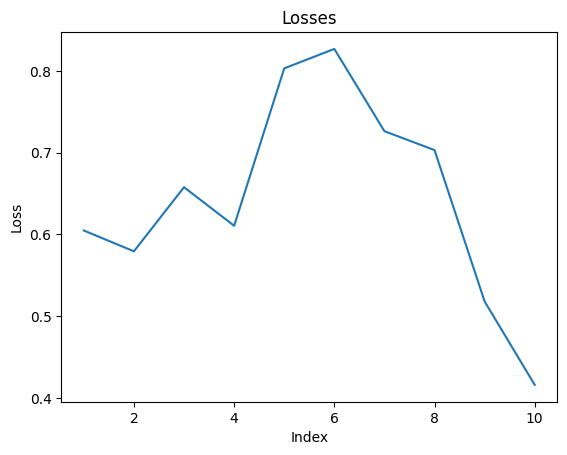


Test set: Average loss: 0.6096, Accuracy: 8390/10000 (84%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.668553
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.522257
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.532949
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.620232
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.722376
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.457865
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.636269
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.698035
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.500762
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.584423


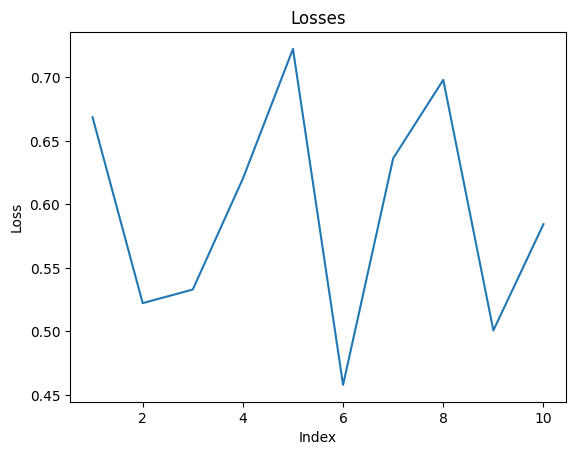


Test set: Average loss: 0.5294, Accuracy: 8572/10000 (86%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.434353
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.420382
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.450253
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.505888
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.545360
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.606582
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.455962
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.644981
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.420692
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.575842


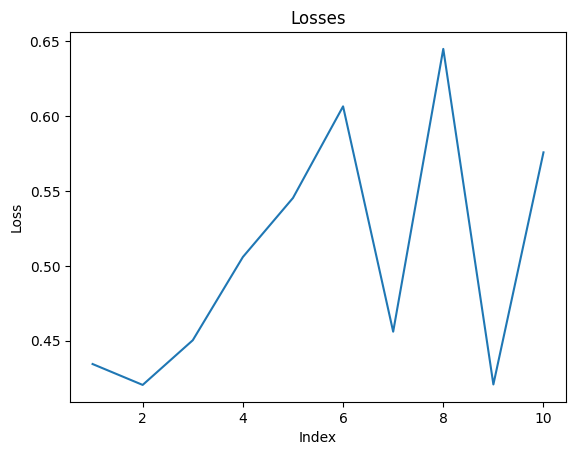


Test set: Average loss: 0.4759, Accuracy: 8684/10000 (87%)



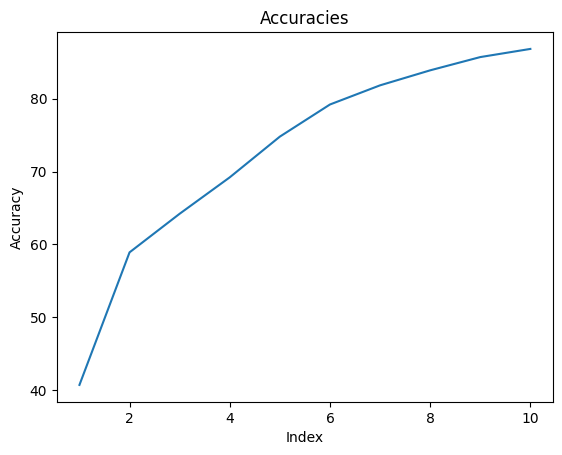

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.0001, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_5().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.0001_lr.pt')

if __name__ == '__main__':
    main()

# **Testing Activation Functions (ReLU, Tanh, Sigmoid, PReLU)**

**Define Class (Model with ReLU Activation Function)**

In [ ]:
class Net_6(nn.Module):
    def __init__(self):
        super(Net_6, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.498190
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.308307
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.308880
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.234635
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.154788
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.268853
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.091637
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.172958
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.048436


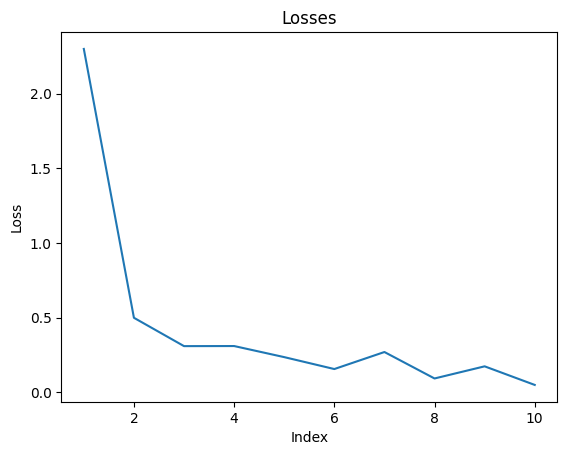


Test set: Average loss: 0.1055, Accuracy: 9678/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.211610
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.059556
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.078691
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.090970
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.093833
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.165407
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.085918
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.079712
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.052998
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.059833


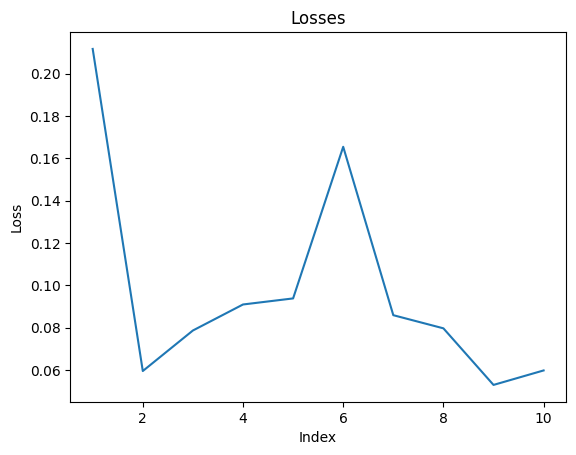


Test set: Average loss: 0.0681, Accuracy: 9781/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.025927
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.074539
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.219866
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.218020
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.009661
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.067735
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.154292
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.029568
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.036099
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.072321


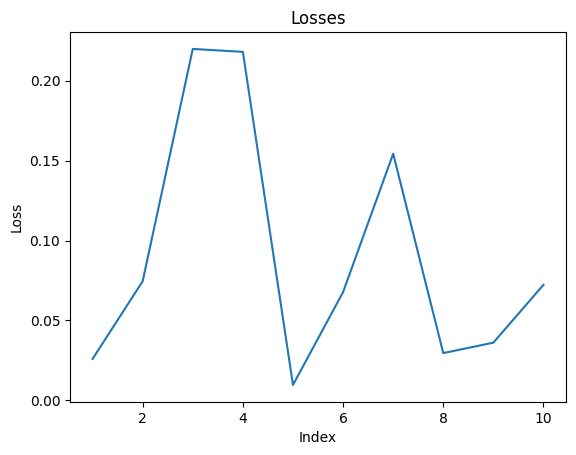


Test set: Average loss: 0.0480, Accuracy: 9838/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.021525
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.025582
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.081811
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.008626
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.061560
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.028641
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.040269
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.070938
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.057505
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014340


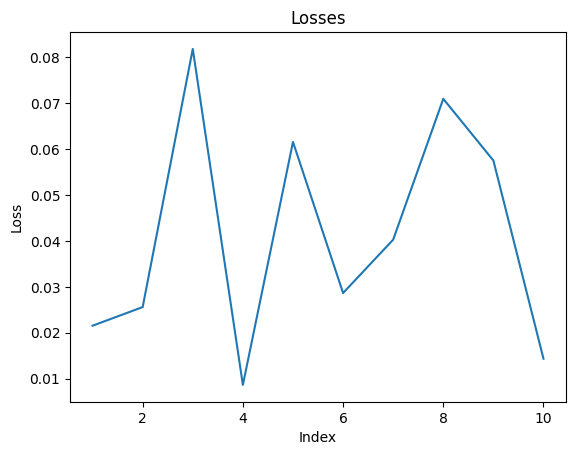


Test set: Average loss: 0.0414, Accuracy: 9860/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.092466
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.094951
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.041601
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.039228
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.034719
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.036642
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.042592
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.035509
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.013031
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.040271


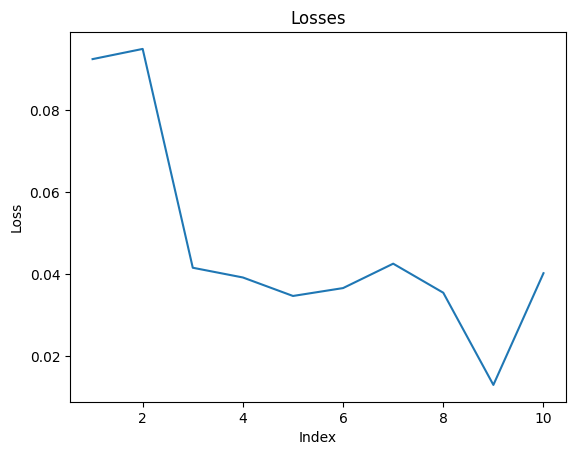


Test set: Average loss: 0.0366, Accuracy: 9877/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.076414
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.002526
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.048873
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.018404
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.009991
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.014872
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.056215
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.033248
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.022839
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.063831


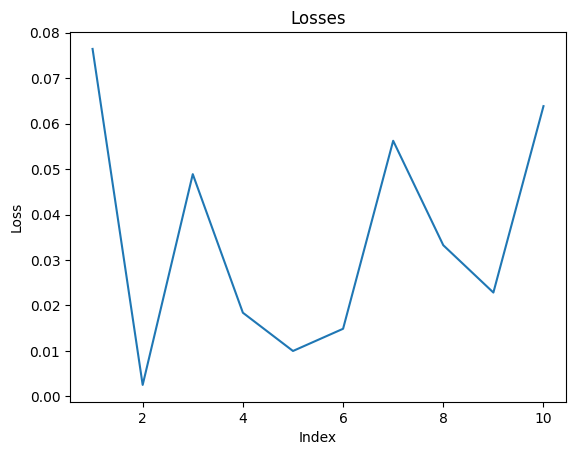


Test set: Average loss: 0.0388, Accuracy: 9877/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.013075
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.093874
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.042093
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.036262
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.005887
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.023955
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.024747
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.005138
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.039066
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.015814


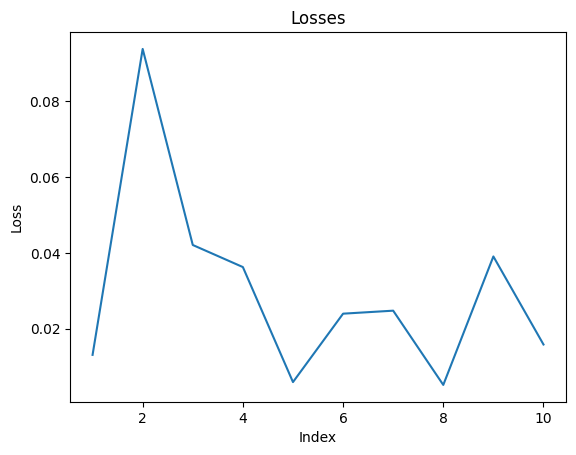


Test set: Average loss: 0.0345, Accuracy: 9886/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.036956
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.027858
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.003999
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.023722
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.039568
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.002984
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.001599
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.054956
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.006720
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.066412


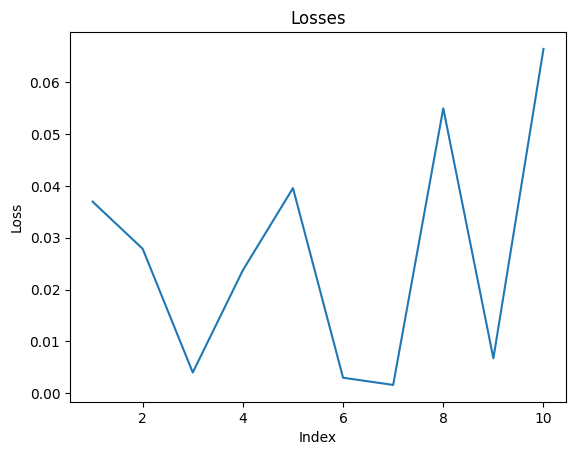


Test set: Average loss: 0.0437, Accuracy: 9849/10000 (98%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.008603
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.007170
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.007113
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.002781
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.009506
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.026617
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.010236
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.082196
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.019118
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.002419


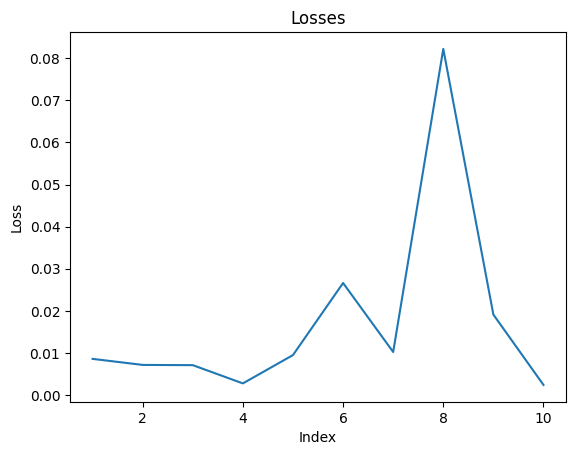


Test set: Average loss: 0.0293, Accuracy: 9908/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.008307
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.004239
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.007579
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.015908
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.099486
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.048477
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.005898
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.029219
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.032101
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.011405


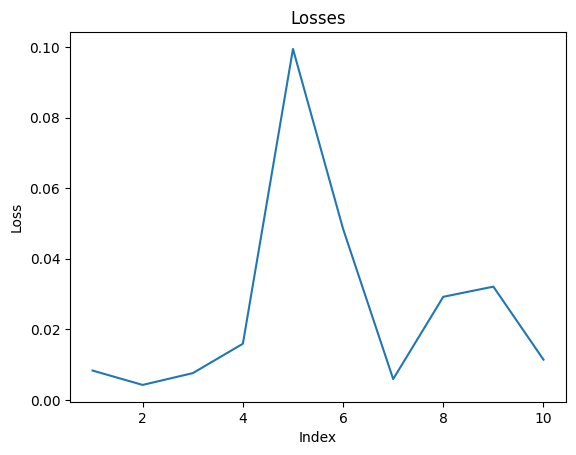


Test set: Average loss: 0.0331, Accuracy: 9891/10000 (99%)



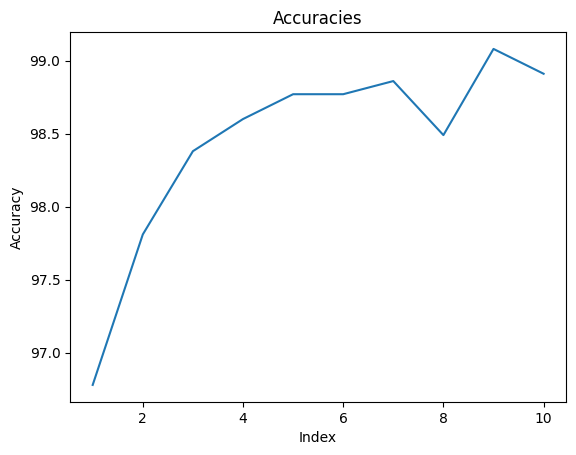

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_6().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_relu.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with Tanh Activation Function)**

In [ ]:
class Net_7(nn.Module):
    def __init__(self):
        super(Net_7, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.tanh(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314444
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.899841
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.419559
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.474643
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.381678
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.319941
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.395563
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.250080
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.288228
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.148769


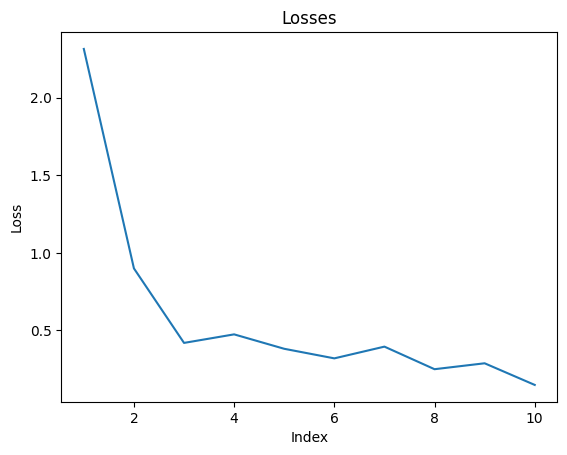


Test set: Average loss: 0.1885, Accuracy: 9467/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.336517
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.193824
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.207916
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.132970
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.126884
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.239273
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.132268
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.187117
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.122301
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.084446


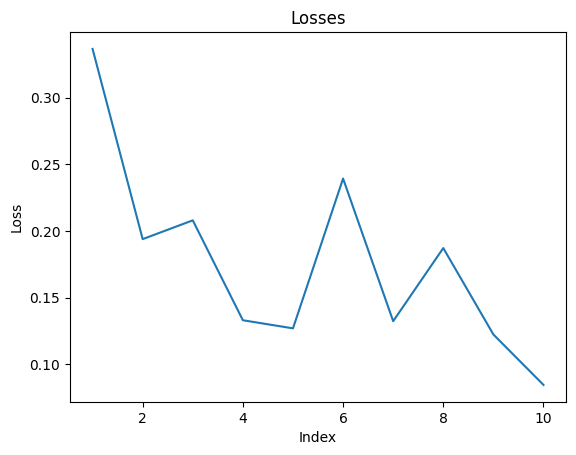


Test set: Average loss: 0.1057, Accuracy: 9701/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.100443
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.178152
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.298091
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.213449
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.061457
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.100760
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.148069
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.070186
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.044509
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.137413


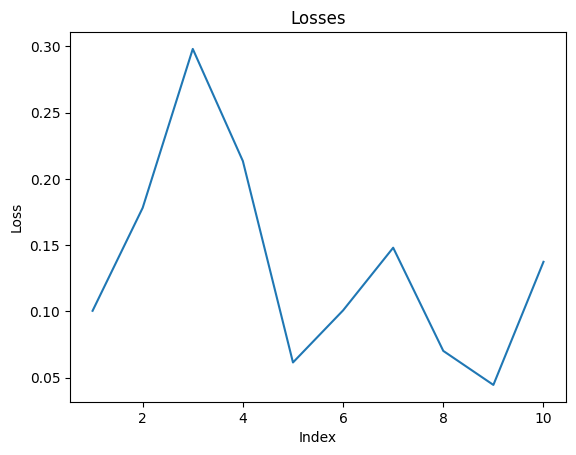


Test set: Average loss: 0.0762, Accuracy: 9784/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.044223
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.036212
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.127816
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.019214
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.043862
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.055024
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.043443
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.090017
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.037391
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.025272


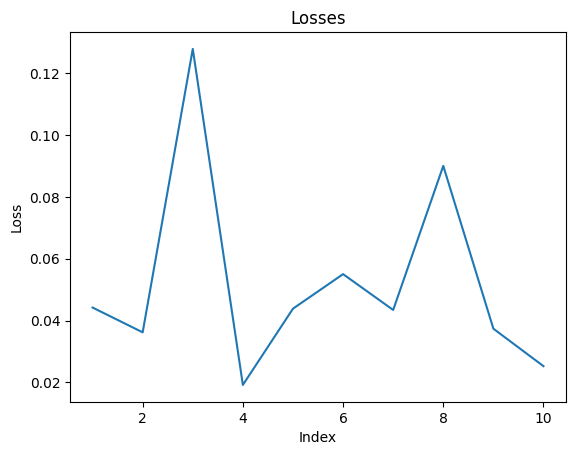


Test set: Average loss: 0.0609, Accuracy: 9828/10000 (98%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.086192
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.115717
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.085297
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.095044
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.031568
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.062856
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.098106
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.157185
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.029568
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.060676


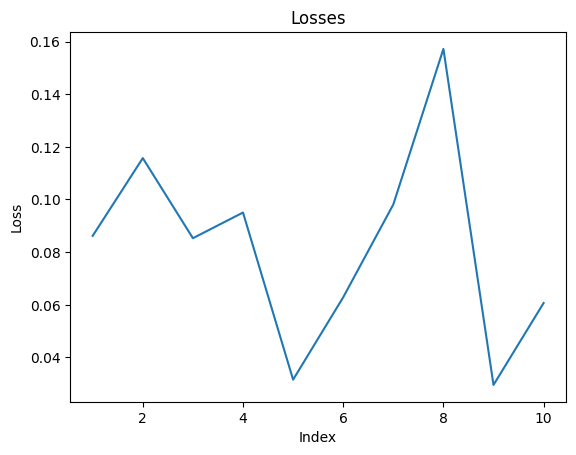


Test set: Average loss: 0.0533, Accuracy: 9850/10000 (98%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.099338
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.024317
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.122357
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.050237
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.022926
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.020230
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.055068
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.097236
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.021494
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.030170


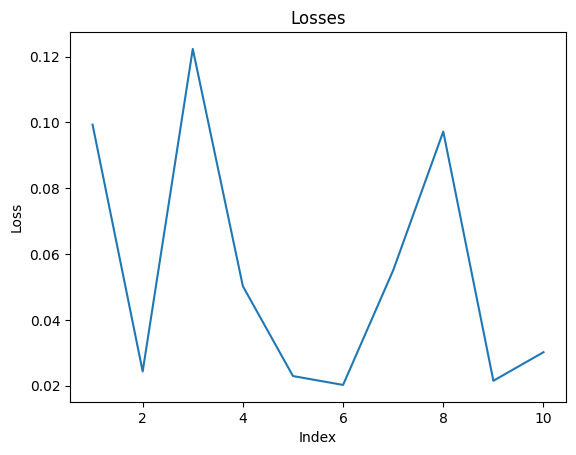


Test set: Average loss: 0.0470, Accuracy: 9863/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.037438
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.108167
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.031983
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.057348
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.020273
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.042624
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.078216
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.038818
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.047711
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.036354


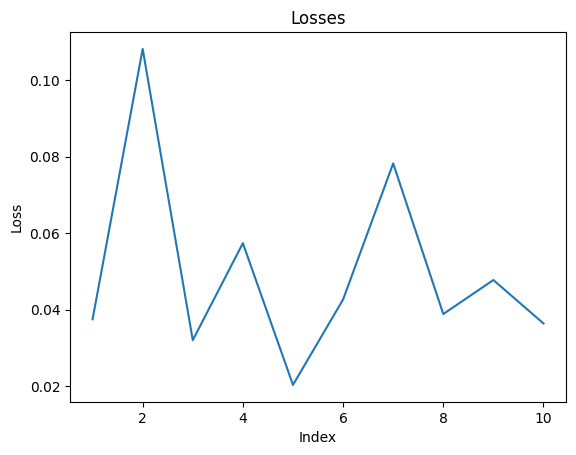


Test set: Average loss: 0.0425, Accuracy: 9879/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.017715
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.037301
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.042494
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.019960
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.118705
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.018389
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.024080
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.083720
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.013675
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.046765


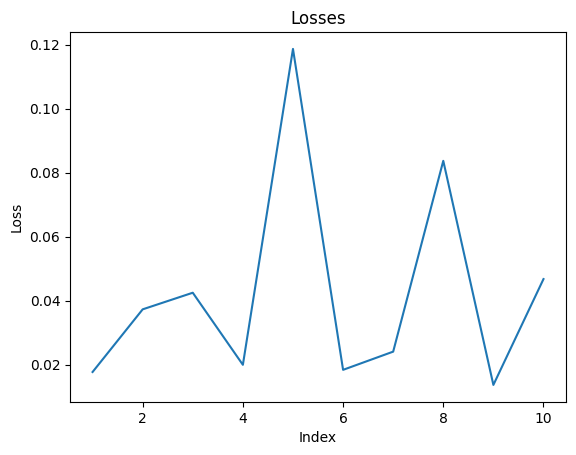


Test set: Average loss: 0.0432, Accuracy: 9865/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.024447
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.025719
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.025175
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.011008
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.031740
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.065111
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.044811
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.089157
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.059501
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.029549


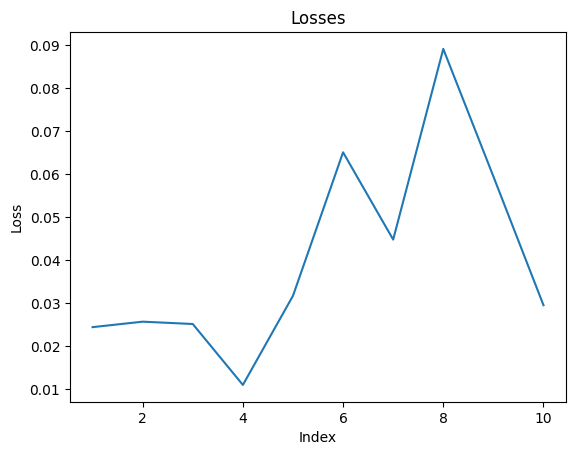


Test set: Average loss: 0.0378, Accuracy: 9888/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.015972
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.010623
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.018109
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.016370
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.102478
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.071483
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.015080
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.052508
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.034830
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.035254


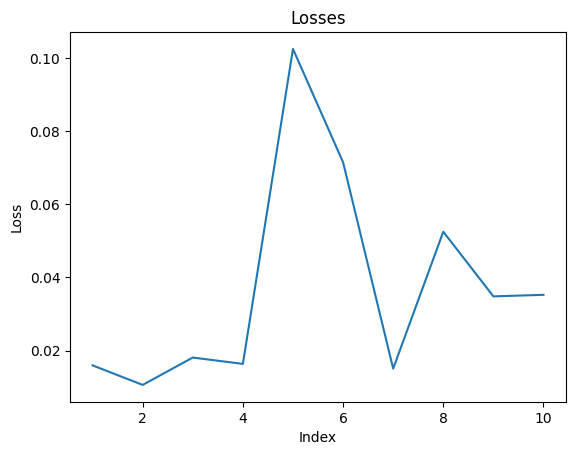


Test set: Average loss: 0.0363, Accuracy: 9886/10000 (99%)



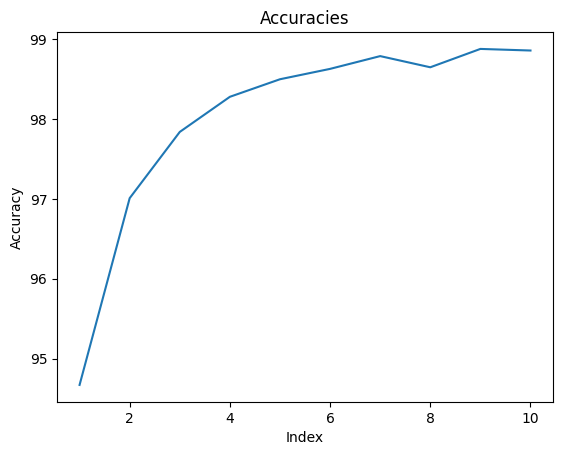

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_7().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_tanh.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with Sigmoid Activation Function)**

In [ ]:
class Net_8(nn.Module):
    def __init__(self):
        super(Net_8, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.sigmoid(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.sigmoid(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.322475
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.281997
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.305236
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.318386
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.320895
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.288574
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.294927
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.268020
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.276856
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.307403


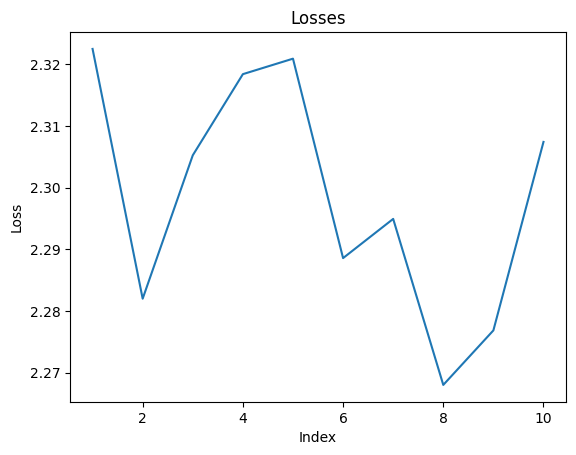


Test set: Average loss: 2.3006, Accuracy: 1010/10000 (10%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.316835
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.330558
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.305642
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.297770
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.289189
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.303692
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.290631
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.282707
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.292782
Train Epoch: 2 [57600/60000 (96%)]	Loss: 2.286952


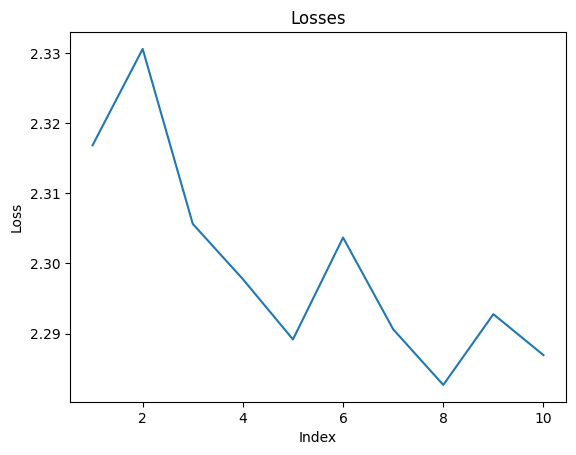


Test set: Average loss: 2.2761, Accuracy: 1735/10000 (17%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.240709
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.277045
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.246971
Train Epoch: 3 [19200/60000 (32%)]	Loss: 2.247560
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.210665
Train Epoch: 3 [32000/60000 (53%)]	Loss: 2.209534
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.176664
Train Epoch: 3 [44800/60000 (75%)]	Loss: 2.067505
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.125379
Train Epoch: 3 [57600/60000 (96%)]	Loss: 2.008112


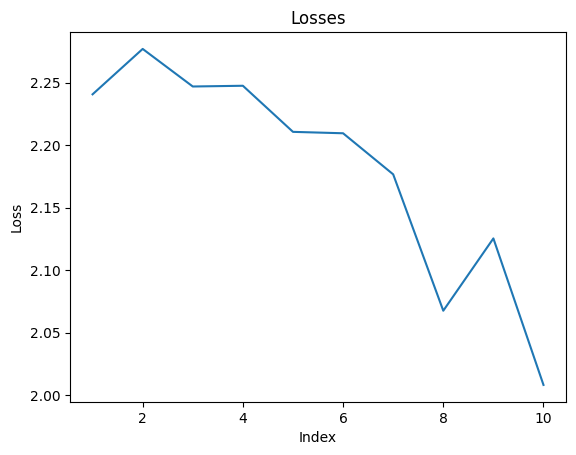


Test set: Average loss: 1.8695, Accuracy: 4708/10000 (47%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.843209
Train Epoch: 4 [6400/60000 (11%)]	Loss: 1.832175
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.688722
Train Epoch: 4 [19200/60000 (32%)]	Loss: 1.499952
Train Epoch: 4 [25600/60000 (43%)]	Loss: 1.318390
Train Epoch: 4 [32000/60000 (53%)]	Loss: 1.289594
Train Epoch: 4 [38400/60000 (64%)]	Loss: 1.167377
Train Epoch: 4 [44800/60000 (75%)]	Loss: 1.159618
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.912620
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.838033


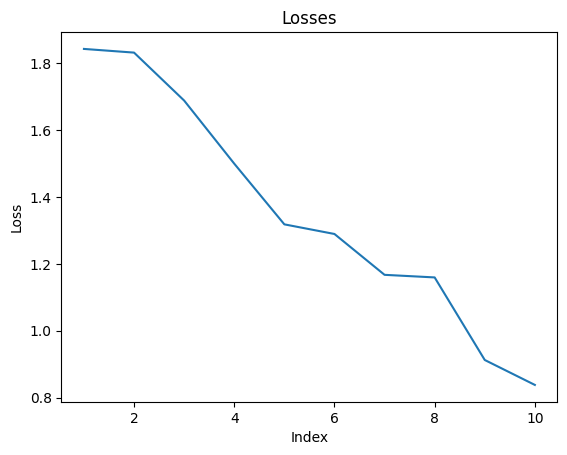


Test set: Average loss: 0.8474, Accuracy: 7706/10000 (77%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.814403
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.654331
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.857819
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.880503
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.636764
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.597453
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.695743
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.649673
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.621877
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.577212


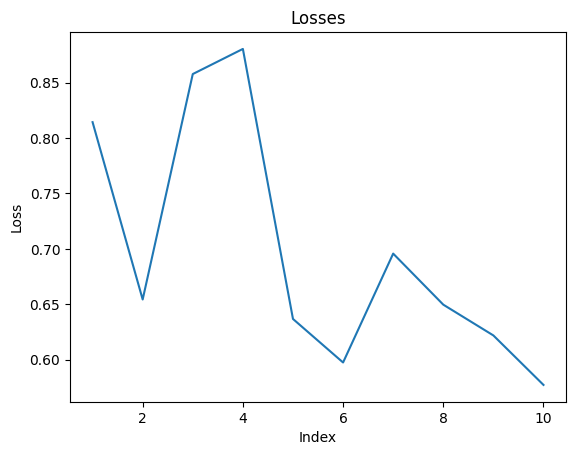


Test set: Average loss: 0.5323, Accuracy: 8440/10000 (84%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.508945
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.683420
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.516481
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.499174
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.491992
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.475047
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.439702
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.575387
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.263549
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.201044


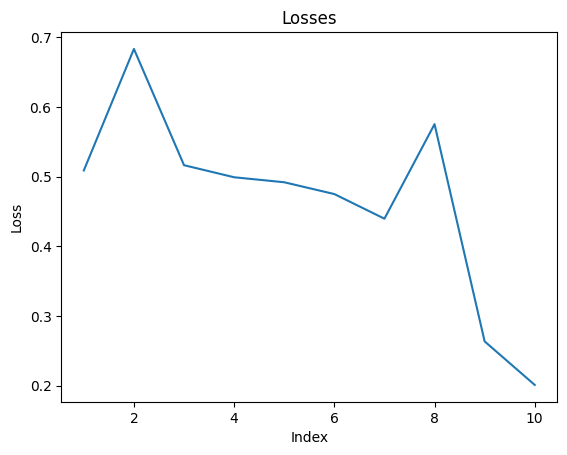


Test set: Average loss: 0.4153, Accuracy: 8778/10000 (88%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.433923
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.351967
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.282340
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.338331
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.302421
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.303215
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.568423
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.381233
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.326901
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.280093


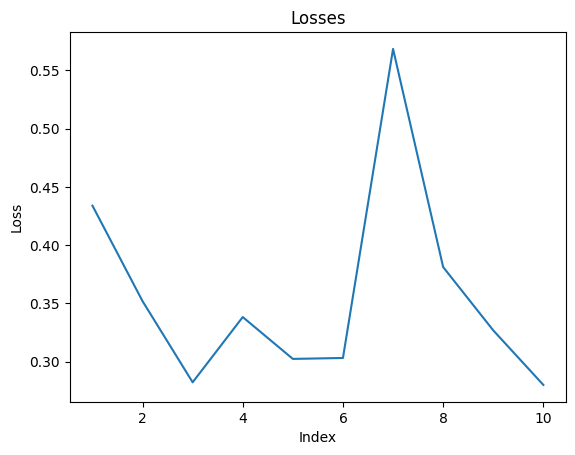


Test set: Average loss: 0.3389, Accuracy: 9026/10000 (90%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.236907
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.236367
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.298509
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.265589
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.464743
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.345635
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.338617
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.283262
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.240169
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.157425


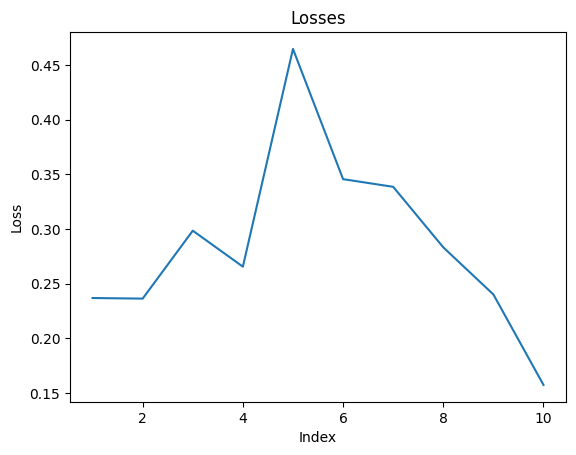


Test set: Average loss: 0.2950, Accuracy: 9127/10000 (91%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.252093
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.215300
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.227270
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.248147
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.333829
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.171636
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.306711
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.290537
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.188793
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.241260



Test set: Average loss: 0.2600, Accuracy: 9238/10000 (92%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.195619
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.222075
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.209454
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.184248
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.373314
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.315320
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.201779
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.336908
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.163501
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.351474


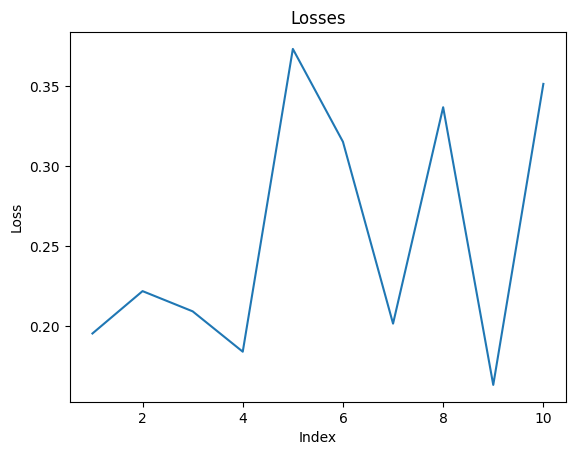


Test set: Average loss: 0.2308, Accuracy: 9304/10000 (93%)



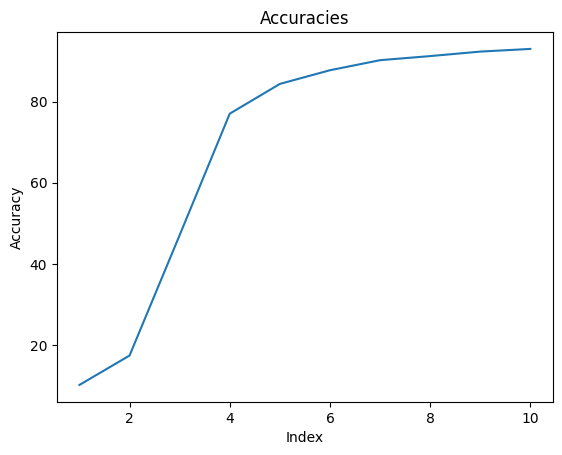

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_8().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_sigmoid.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with PReLU Activation Function)**

In [ ]:
class Net_9(nn.Module):
    def __init__(self):
        super(Net_9, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.prelu(self.conv1(x), torch.full((20, ), 0.25))
        x = F.max_pool2d(x, 2, 2)
        x = F.prelu(self.conv2(x), torch.full((50, ), 0.25))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.prelu(self.fc1(x), torch.full((500, ), 0.25))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303185
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.461077
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.285999
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.324206
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.233860
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.157931
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.252125
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.100230
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.186443
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.050191


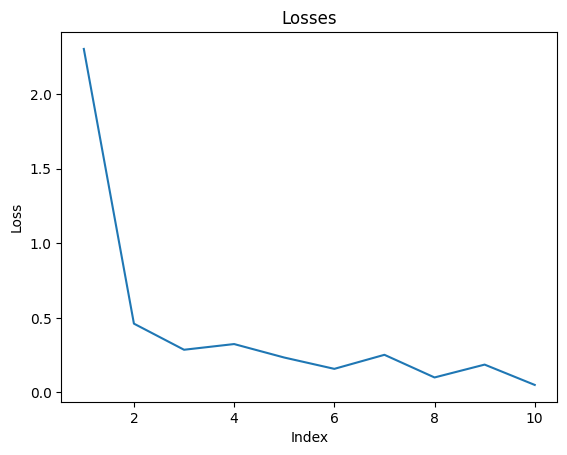


Test set: Average loss: 0.1060, Accuracy: 9677/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.214938
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.061057
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.081088
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.094743
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.089073
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.168156
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.078461
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.079089
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.058439
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.065901


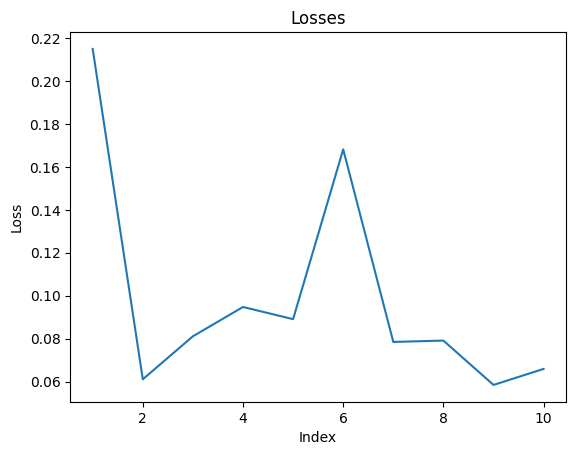


Test set: Average loss: 0.0716, Accuracy: 9774/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.032574
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.075129
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.218975
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.235297
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.008726
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.075093
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.155117
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.031098
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.027803
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.078212


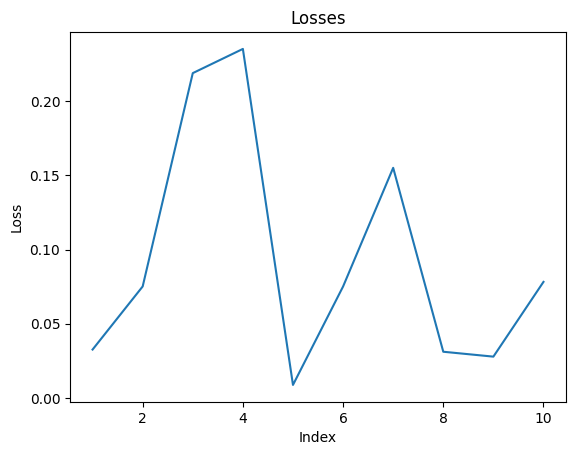


Test set: Average loss: 0.0496, Accuracy: 9845/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.025458
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.021649
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.093611
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.010019
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.061954
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.023279
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.035667
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.078214
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.046781
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.024155


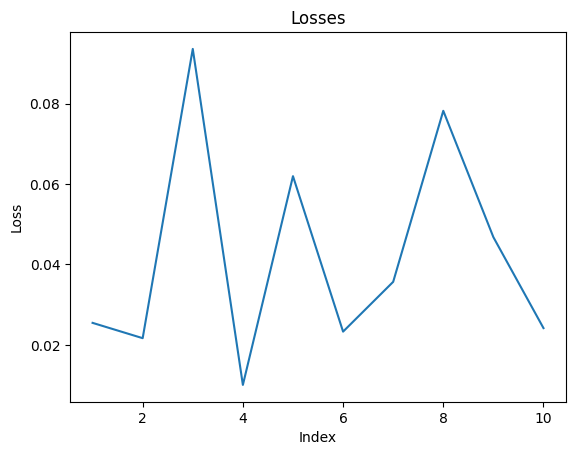


Test set: Average loss: 0.0418, Accuracy: 9861/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.096425
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.089737
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.043554
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.036377
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.029162
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.026252
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.041148
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.055719
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.012290
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.046726


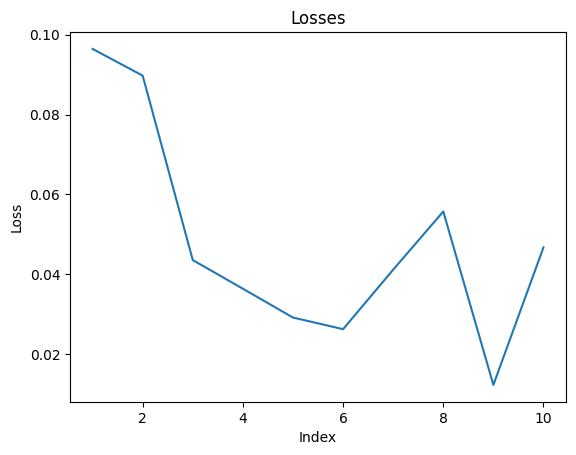


Test set: Average loss: 0.0378, Accuracy: 9874/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.069617
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.002686
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.064046
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.024403
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.004894
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.017084
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.064298
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.037070
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.023113
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.062046


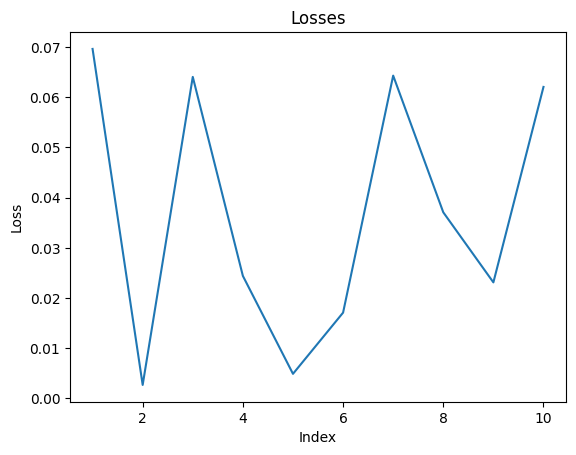


Test set: Average loss: 0.0379, Accuracy: 9881/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.012925
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.101257
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.050266
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.036270
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.008301
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.017533
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.030553
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.004271
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.032848
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.015043



Test set: Average loss: 0.0376, Accuracy: 9873/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.036272
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.025739
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.005147
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.016278
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.048851
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.005006
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.002056
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.063086
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.008000
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.078939



Test set: Average loss: 0.0457, Accuracy: 9853/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.012053
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.007025
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.011355
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.003007
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.010796
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.048597
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.015602
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.062537
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.021745
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.004464


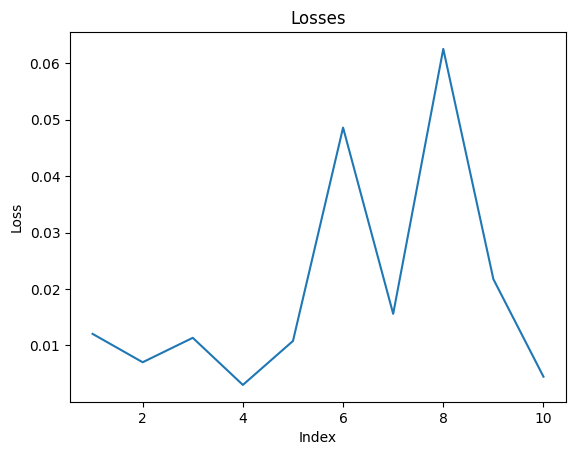


Test set: Average loss: 0.0327, Accuracy: 9889/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.016412
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.006741
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.015038
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.012169
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.129009
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.050681
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.011404
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.032153
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.037500
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.016836


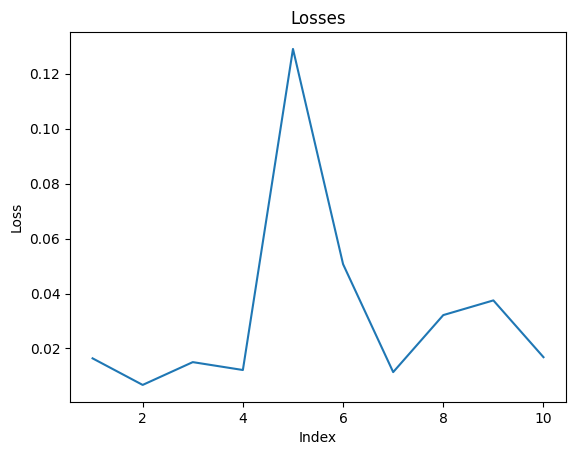


Test set: Average loss: 0.0327, Accuracy: 9886/10000 (99%)



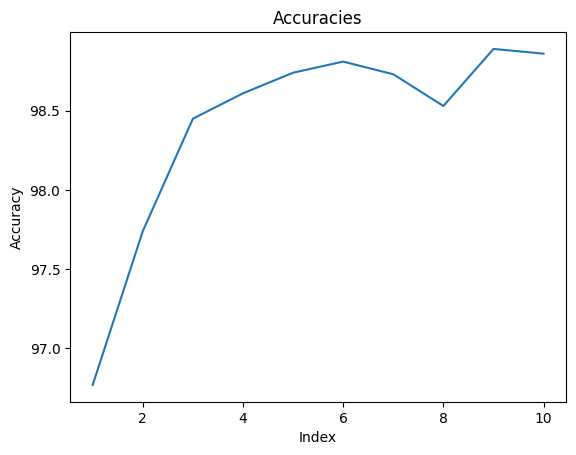

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_9().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_prelu.pt')

if __name__ == '__main__':
    main()

# **Testing Batch Norm for every Convolutional Layer**



**Define Class**

In [ ]:
class Net_10(nn.Module):
    def __init__(self):
        super(Net_10, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.batch_norm1= nn.BatchNorm2d(20)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.batch_norm2 = nn.BatchNorm2d(50)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.325488
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.194643
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.116957
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.165232
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.147438
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.059641
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.109557
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.039921
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.071631
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.043402


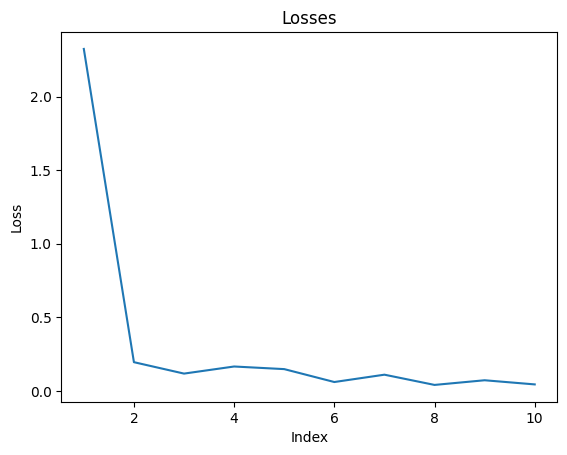


Test set: Average loss: 0.0506, Accuracy: 9849/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.078586
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.035778
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.031170
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.016746
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.017777
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.093960
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.035319
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.084804
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.034538
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.017300


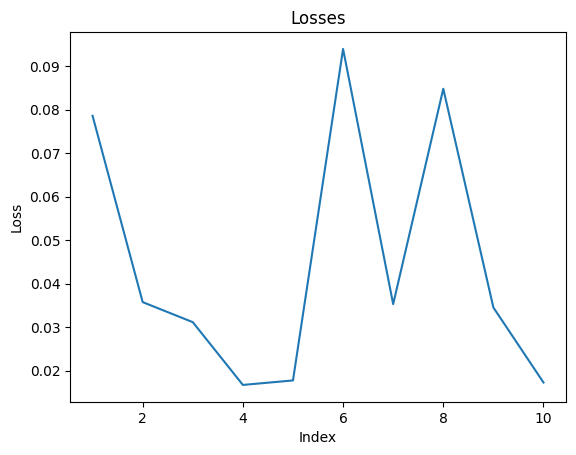


Test set: Average loss: 0.0356, Accuracy: 9885/10000 (99%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.008625
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.096692
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.065497
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.024043
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.008615
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.024245
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.063534
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.006772
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.009780
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.111859


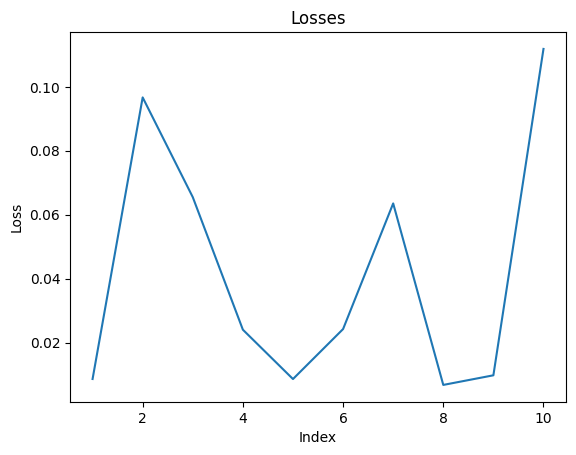


Test set: Average loss: 0.0317, Accuracy: 9891/10000 (99%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.016738
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.003292
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.075730
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.004080
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.006896
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.015907
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.045283
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.063809
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.035937
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.012543


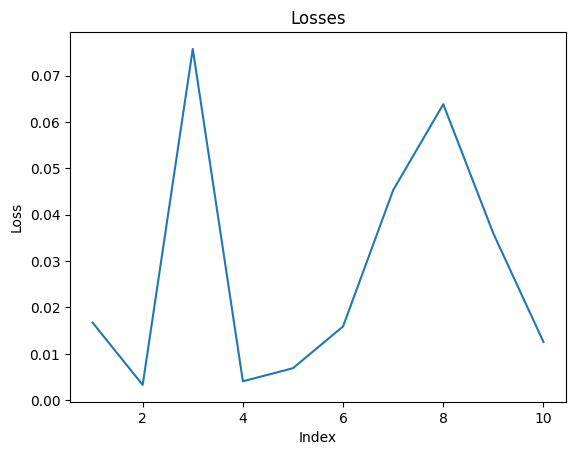


Test set: Average loss: 0.0279, Accuracy: 9905/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.024960
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.021098
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.008867
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.014190
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.012624
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.012368
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.022788
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.015967
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.008898
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.018668



Test set: Average loss: 0.0273, Accuracy: 9907/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.005338
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.001358
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.027200
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.011823
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.003880
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.007352
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.018772
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.003404
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.028955
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.045496



Test set: Average loss: 0.0283, Accuracy: 9906/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.003014
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.016179
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.005341
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.024191
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.004502
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.017421
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.004163
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.002152
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.002658
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.007085


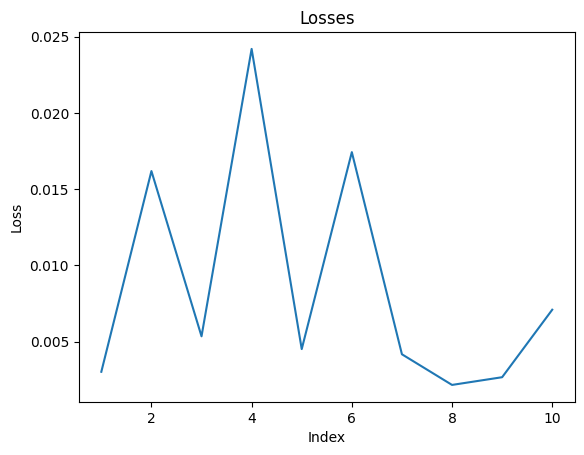


Test set: Average loss: 0.0274, Accuracy: 9901/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.002127
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.003617
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.003742
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.002114
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.007688
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.000939
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.000485
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.001864
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.001078
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.039604



Test set: Average loss: 0.0270, Accuracy: 9905/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.003727
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.001830
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.003626
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.000625
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.014148
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.007705
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.003126
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.009040
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.003128
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.002526


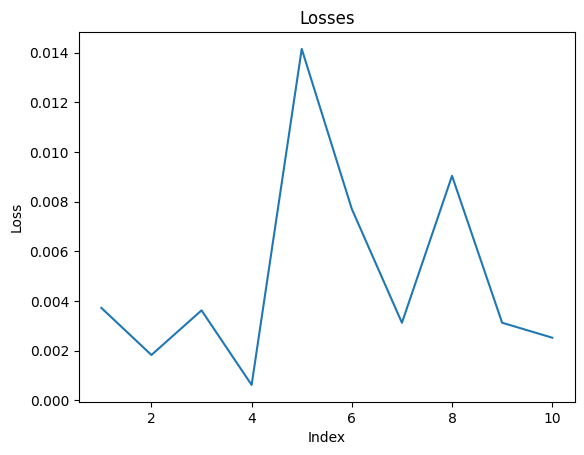


Test set: Average loss: 0.0248, Accuracy: 9921/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.002801
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.000425
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.002275
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.003212
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.007449
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.009044
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.000975
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.001742
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.000372
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.003429


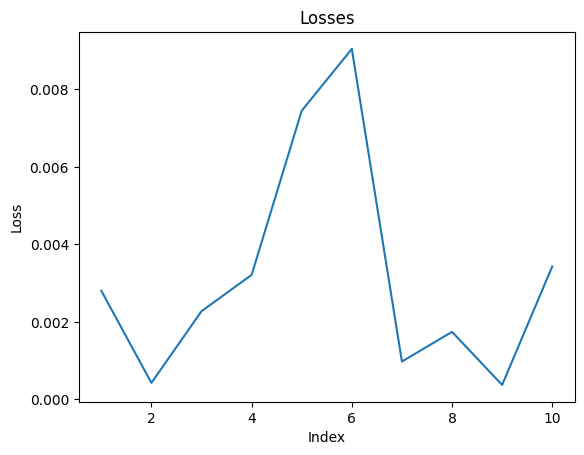


Test set: Average loss: 0.0263, Accuracy: 9913/10000 (99%)



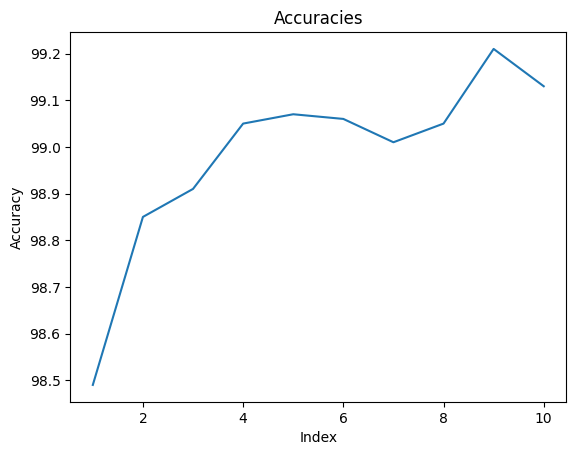

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_10().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_batch_norm.pt')

if __name__ == '__main__':
    main()

# **Testing Different Dropout Percentages for fc1 (50%, 10%, 90%)**

**Define Class (Model with 50% Dropout)**

In [ ]:
class Net_11(nn.Module):
    def __init__(self):
        super(Net_11, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.322129
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.552516
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.360539
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.337452
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.297883
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.220137
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.223238
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.126477
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.195942
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.081349


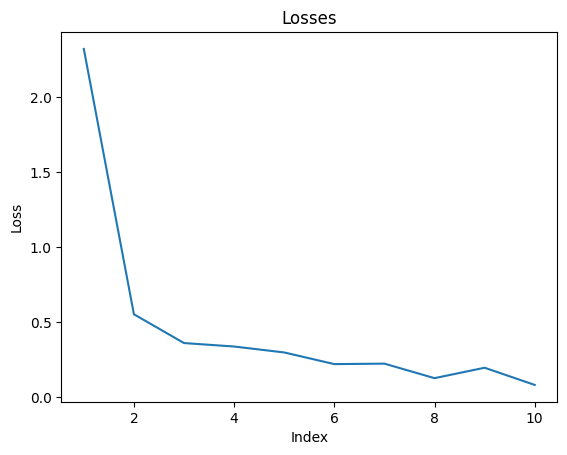


Test set: Average loss: 0.1004, Accuracy: 9695/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.185996
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.177098
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.090454
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.128305
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.038525
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.038217
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.191507
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.065504
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.081742
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.096072


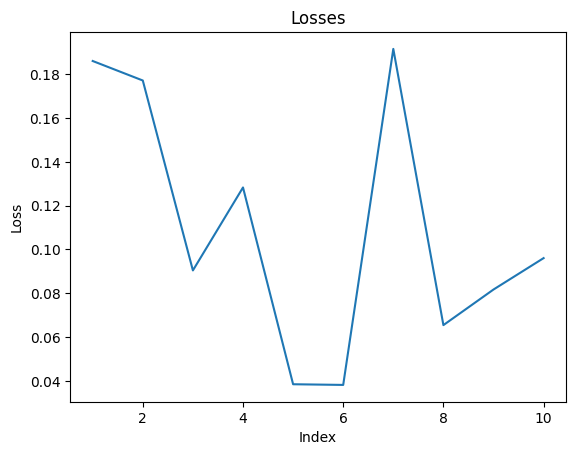


Test set: Average loss: 0.0591, Accuracy: 9815/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.086179
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.048591
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.055638
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.259843
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.077299
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.100818
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.084333
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.078320
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.040570
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.023385


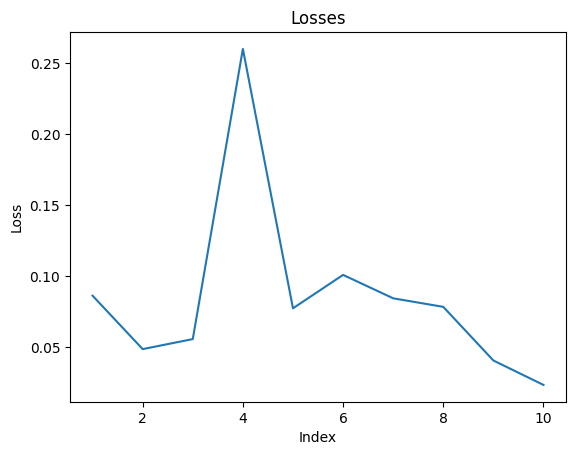


Test set: Average loss: 0.0459, Accuracy: 9849/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.154487
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.091250
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.022152
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.025444
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.065868
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.049814
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.075617
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.016959
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.049515
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.009927


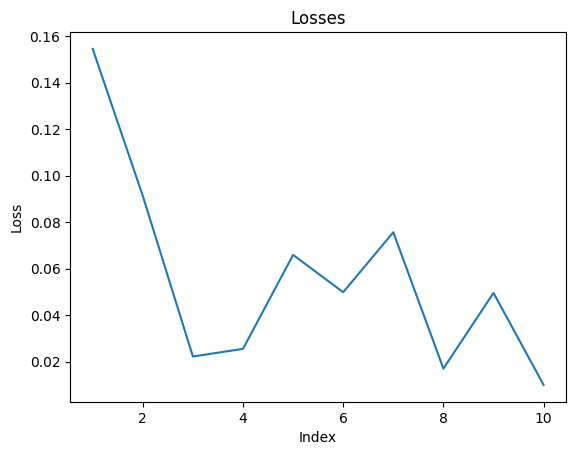


Test set: Average loss: 0.0387, Accuracy: 9880/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.069062
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.067139
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.040895
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.028669
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.035080
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.161481
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.050399
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.017739
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.123100
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.013905



Test set: Average loss: 0.0337, Accuracy: 9889/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.077480
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.112818
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.047277
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.007805
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.027462
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.062157
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.038687
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.042737
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.020320
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.003056


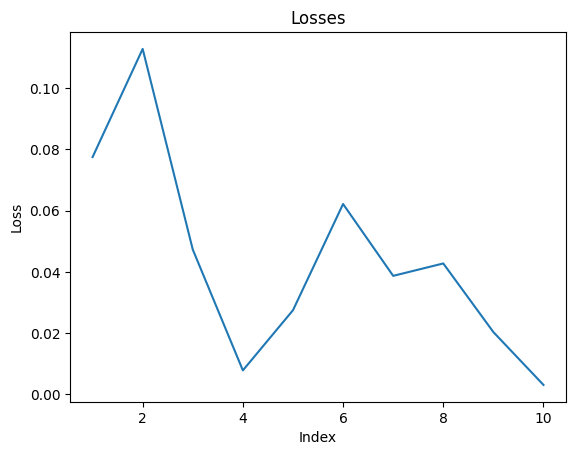


Test set: Average loss: 0.0317, Accuracy: 9898/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.009079
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.037651
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.013773
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.039204
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.031919
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.034428
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.118970
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.049589
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.006964
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.029801


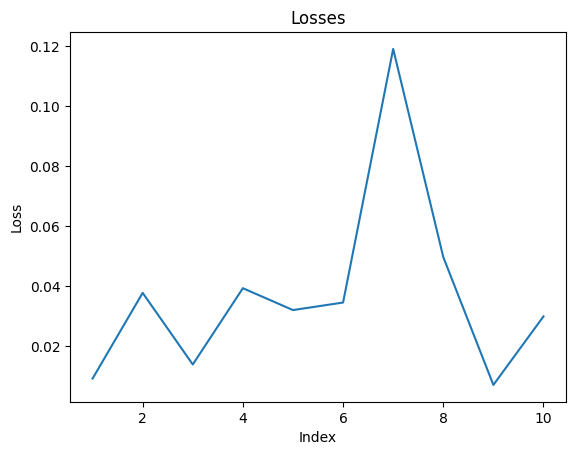


Test set: Average loss: 0.0329, Accuracy: 9888/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.032863
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.096438
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.018867
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.070560
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.004770
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.015847
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.110046
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.011152
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.014816
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.065392


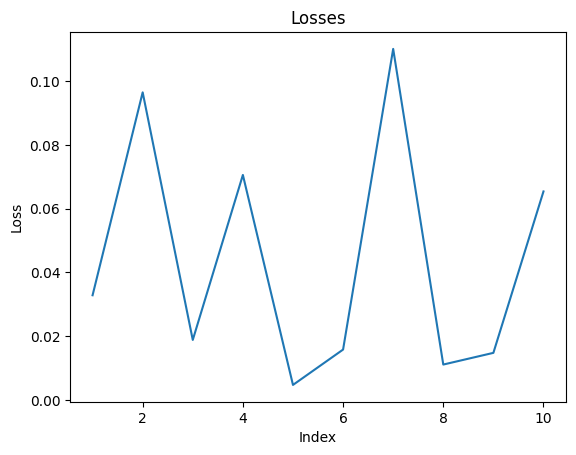


Test set: Average loss: 0.0294, Accuracy: 9902/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.034292
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.030536
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.023118
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.004776
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.096869
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.013417
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.011070
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.008025
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.049317
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.002274


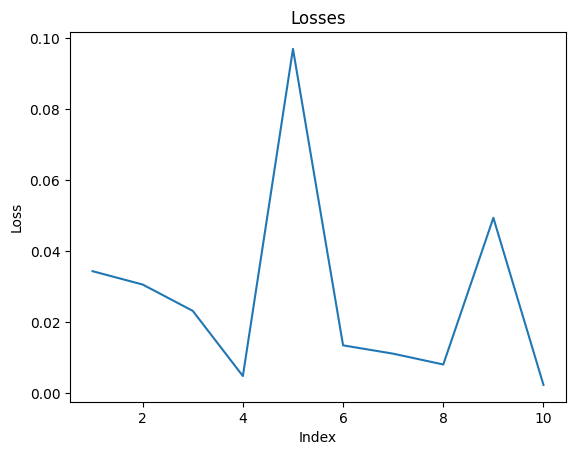


Test set: Average loss: 0.0252, Accuracy: 9916/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.019480
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.011726
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.012993
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.018294
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.021168
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.021566
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.032388
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.015388
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.009897
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.083496


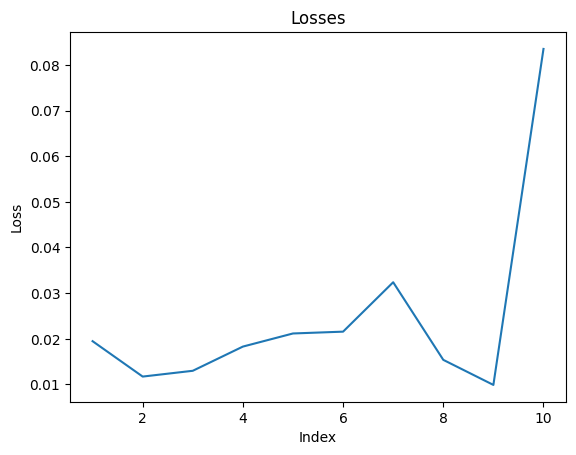


Test set: Average loss: 0.0258, Accuracy: 9917/10000 (99%)



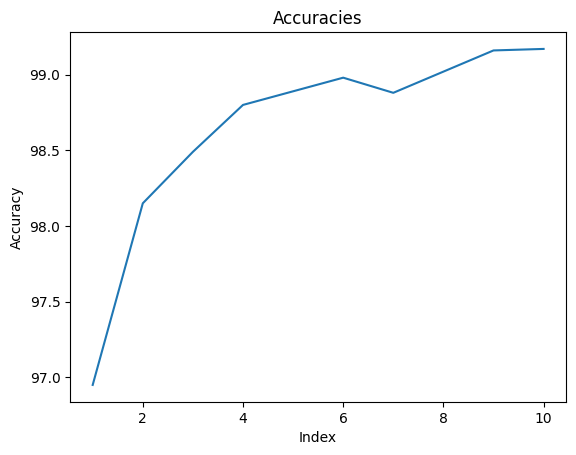

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_11().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_50_dropout_fc1.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with 10% Dropout)**

In [ ]:
class Net_12(nn.Module):
    def __init__(self):
        super(Net_12, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297824
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.545781
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.338510
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.305428
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.214428
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.167373
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.276666
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.097574
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.152310
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.057903


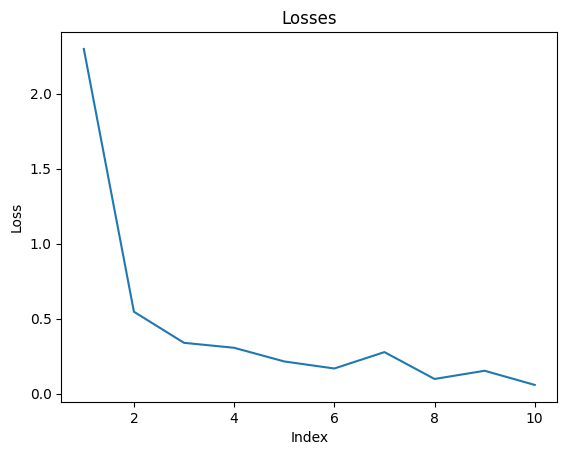


Test set: Average loss: 0.1048, Accuracy: 9668/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.133811
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.132667
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.052353
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.061022
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.030667
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.031427
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.137554
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.051797
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.057374
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.113511


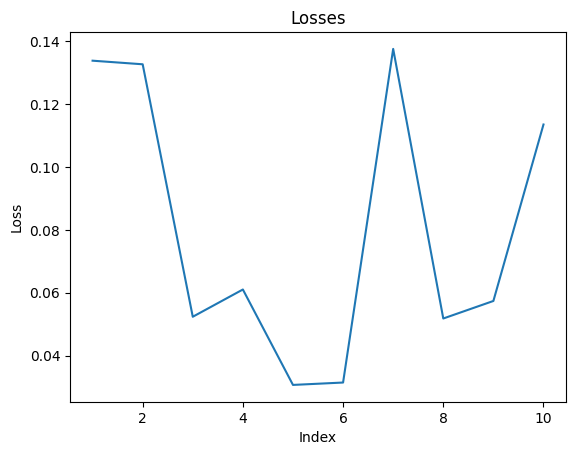


Test set: Average loss: 0.0615, Accuracy: 9802/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.059428
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.039447
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.020363
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.198514
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.057207
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.070260
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.028960
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.064995
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.014671
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.031627


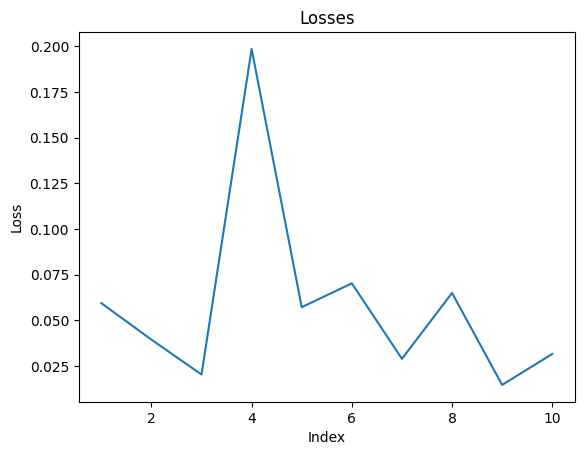


Test set: Average loss: 0.0468, Accuracy: 9846/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.087229
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.037579
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.017198
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.015311
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.031876
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.018398
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.045613
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.016994
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.033465
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014211


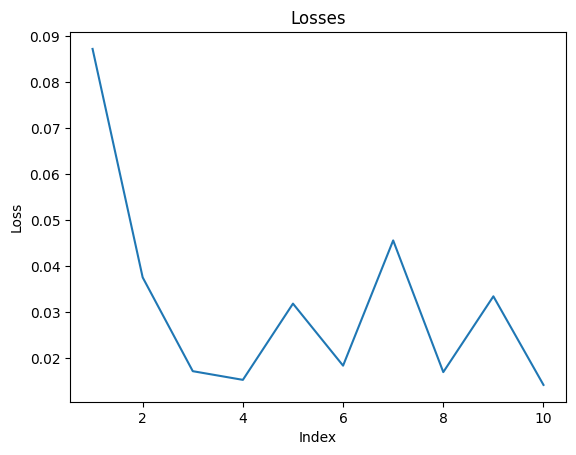


Test set: Average loss: 0.0376, Accuracy: 9882/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.041610
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.018720
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.046820
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.005588
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.015145
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.120331
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.054493
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.014999
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.118892
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.029997


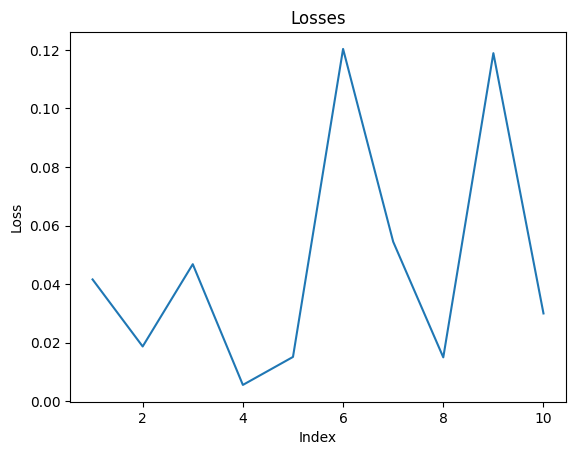


Test set: Average loss: 0.0329, Accuracy: 9898/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.015773
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.032950
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.054316
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.007398
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.025597
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.048069
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.005352
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.035547
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.008821
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.001257



Test set: Average loss: 0.0346, Accuracy: 9887/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.013100
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.025088
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.004375
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.025436
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.011263
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.020610
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.046517
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.037094
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.002396
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.038809


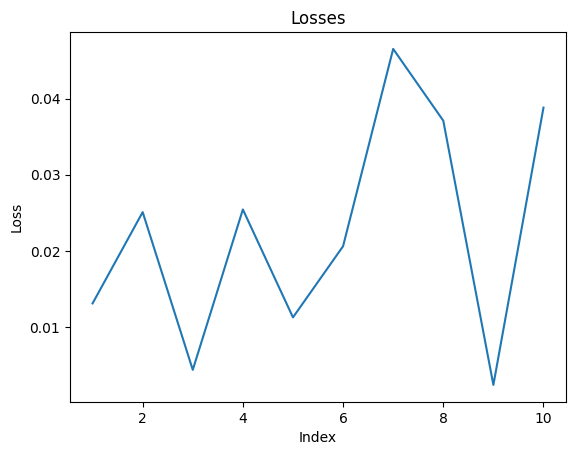


Test set: Average loss: 0.0334, Accuracy: 9887/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.025959
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.103994
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.004920
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.011830
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.005599
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.008521
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.080954
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.004852
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.004129
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.050627



Test set: Average loss: 0.0302, Accuracy: 9892/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.039181
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.046273
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.008890
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.004766
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.125025
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.009514
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.006376
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.013761
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.014998
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.001678



Test set: Average loss: 0.0300, Accuracy: 9909/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.009394
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.008271
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.042218
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.004685
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.007156
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.002305
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.010169
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.022596
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.001996
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.074977



Test set: Average loss: 0.0306, Accuracy: 9902/10000 (99%)



In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_12().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_10_dropout_fc1.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with 90% Dropout)**

In [ ]:
class Net_13(nn.Module):
    def __init__(self):
        super(Net_13, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.dropout1 = nn.Dropout(0.9)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.412243
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.372768
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.822874
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.702203
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.468836
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.429332
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.350472
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.314829
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.478497
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.267058



Test set: Average loss: 0.1241, Accuracy: 9626/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.261758
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.517917
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.282492
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.206874
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.118911
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.202834
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.165928
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.118958
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.295950
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.313832


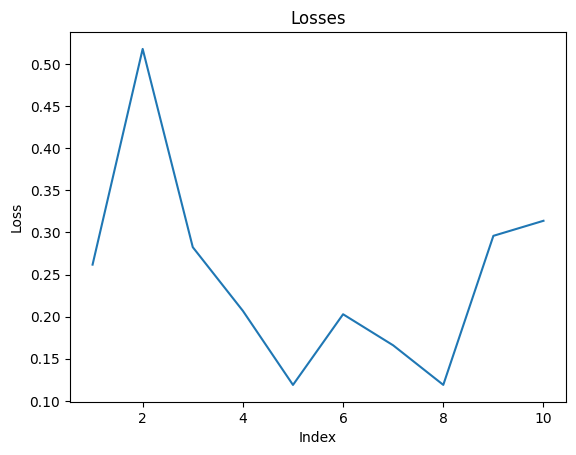


Test set: Average loss: 0.0762, Accuracy: 9747/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.252199
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.147519
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.167748
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.399994
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.145501
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.238549
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.150184
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.295440
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.080982
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.214005


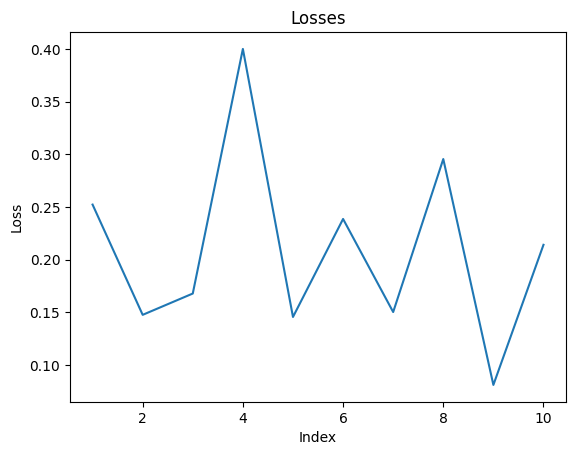


Test set: Average loss: 0.0594, Accuracy: 9802/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.237188
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.138266
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.098635
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.074034
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.111953
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.206994
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.095127
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.062307
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.142887
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.064291


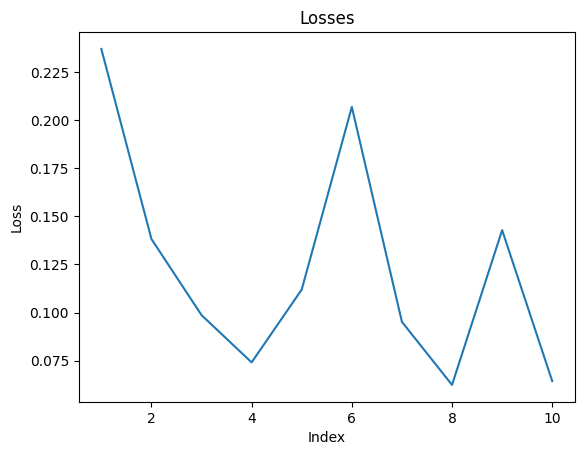


Test set: Average loss: 0.0492, Accuracy: 9838/10000 (98%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.073126
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.150134
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.126329
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.074306
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.088210
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.145226
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.146284
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.092170
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.234809
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.048220



Test set: Average loss: 0.0415, Accuracy: 9864/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.108305
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.145865
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.109113
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.015681
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.086999
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.125797
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.010275
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.114636
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.151215
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.040060



Test set: Average loss: 0.0404, Accuracy: 9870/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.065075
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.063161
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.061889
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.060597
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.161650
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.080205
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.223672
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.057323
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.027433
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.102384


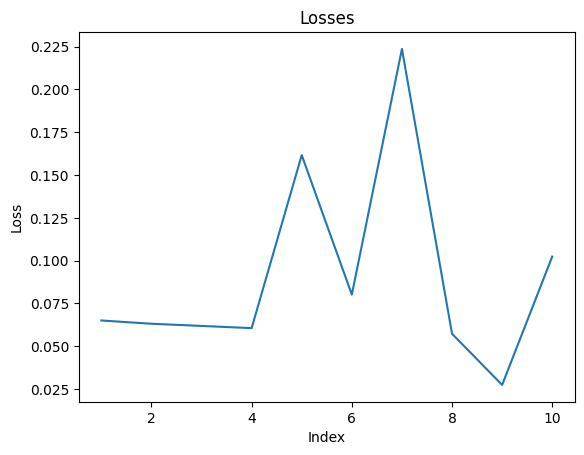


Test set: Average loss: 0.0354, Accuracy: 9883/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.053187
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.180544
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.053226
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.100239
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.086509
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.031929
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.134564
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.038794
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.068007
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.063364



Test set: Average loss: 0.0324, Accuracy: 9896/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.111866
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.137494
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.127639
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.031607
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.119857
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.034676
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.039115
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.063206
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.151647
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.059449


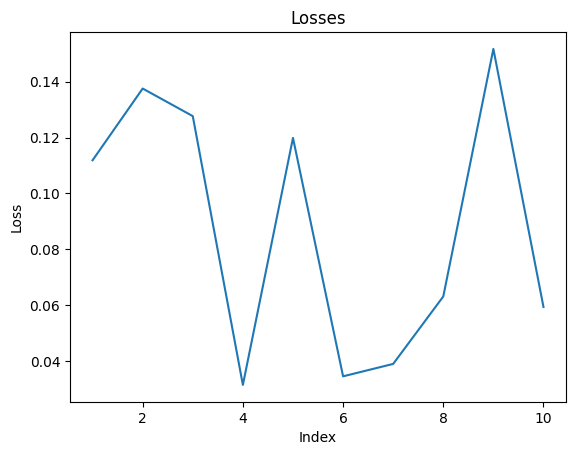


Test set: Average loss: 0.0295, Accuracy: 9912/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.040569
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.021529
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.099430
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.021140
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.112793
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.072677
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.112904
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.165335
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.041390
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.161020


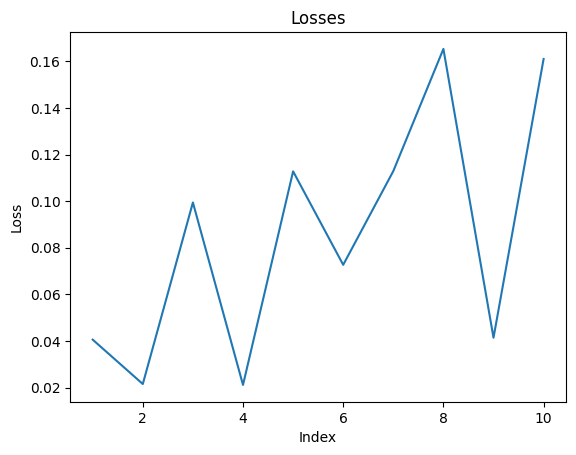


Test set: Average loss: 0.0301, Accuracy: 9897/10000 (99%)



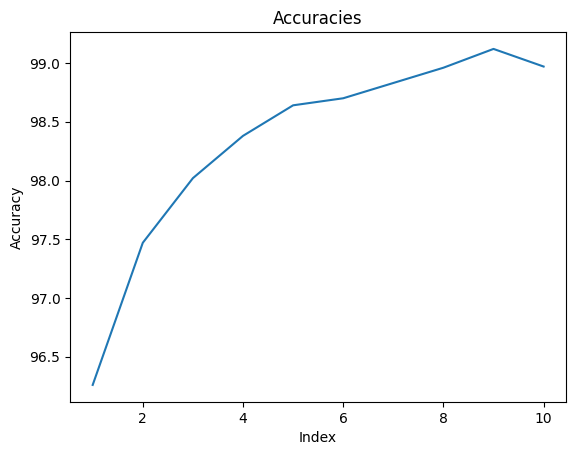

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_13().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_90_dropout_fc1.pt')

if __name__ == '__main__':
    main()

# **Testing Different Optimizers (RMSProp, Adam)**

**Define Class (Model with RMSProp Optimizer)**

In [ ]:
class Net_14(nn.Module):
    def __init__(self):
        super(Net_14, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.285987
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.320935
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.304923
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.303434
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.294468
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.299406
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.297666
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.288349
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.311116


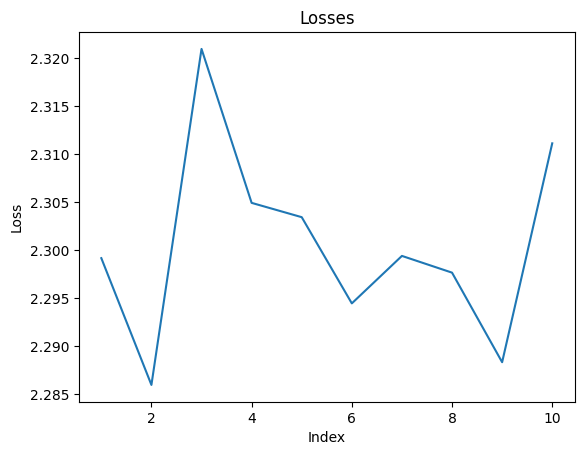


Test set: Average loss: 2.3043, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.322764
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.306315
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.298306
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.313748
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.299548
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.305466
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.301931
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.299160
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.299052
Train Epoch: 2 [57600/60000 (96%)]	Loss: 2.304878


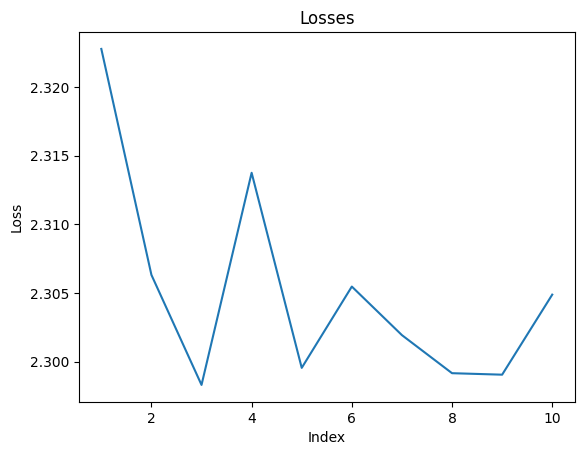


Test set: Average loss: 2.3031, Accuracy: 1135/10000 (11%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.270350
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.314341
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.294497
Train Epoch: 3 [19200/60000 (32%)]	Loss: 2.290712
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.304399
Train Epoch: 3 [32000/60000 (53%)]	Loss: 2.307391
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.309343
Train Epoch: 3 [44800/60000 (75%)]	Loss: 2.296372
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.316993
Train Epoch: 3 [57600/60000 (96%)]	Loss: 2.320715


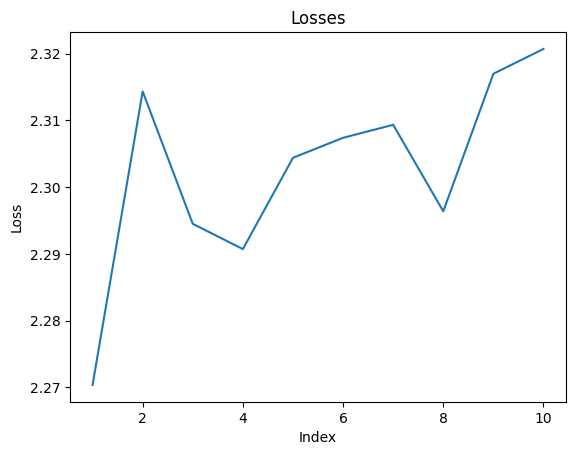


Test set: Average loss: 2.3032, Accuracy: 980/10000 (10%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.291963
Train Epoch: 4 [6400/60000 (11%)]	Loss: 2.323292
Train Epoch: 4 [12800/60000 (21%)]	Loss: 2.291565
Train Epoch: 4 [19200/60000 (32%)]	Loss: 2.309447
Train Epoch: 4 [25600/60000 (43%)]	Loss: 2.303169
Train Epoch: 4 [32000/60000 (53%)]	Loss: 2.293143
Train Epoch: 4 [38400/60000 (64%)]	Loss: 2.314206
Train Epoch: 4 [44800/60000 (75%)]	Loss: 2.311969
Train Epoch: 4 [51200/60000 (85%)]	Loss: 2.311712
Train Epoch: 4 [57600/60000 (96%)]	Loss: 2.306663


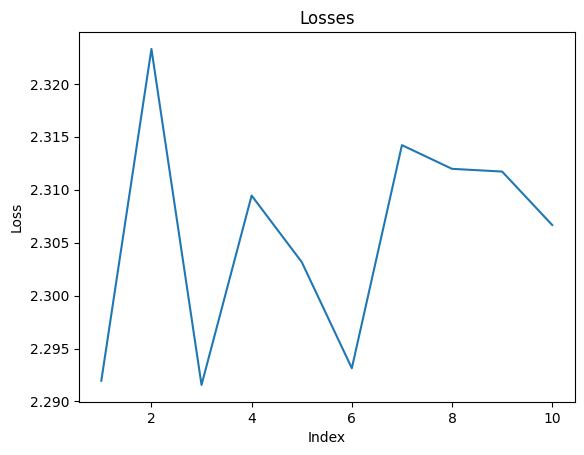


Test set: Average loss: 2.3019, Accuracy: 1135/10000 (11%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 2.307133
Train Epoch: 5 [6400/60000 (11%)]	Loss: 2.290658
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.295026
Train Epoch: 5 [19200/60000 (32%)]	Loss: 2.310275
Train Epoch: 5 [25600/60000 (43%)]	Loss: 2.299222
Train Epoch: 5 [32000/60000 (53%)]	Loss: 2.299546
Train Epoch: 5 [38400/60000 (64%)]	Loss: 2.304696
Train Epoch: 5 [44800/60000 (75%)]	Loss: 2.312782
Train Epoch: 5 [51200/60000 (85%)]	Loss: 2.298831
Train Epoch: 5 [57600/60000 (96%)]	Loss: 2.310605



Test set: Average loss: 2.3023, Accuracy: 1010/10000 (10%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 2.303046
Train Epoch: 6 [6400/60000 (11%)]	Loss: 2.309048
Train Epoch: 6 [12800/60000 (21%)]	Loss: 2.308498
Train Epoch: 6 [19200/60000 (32%)]	Loss: 2.293934
Train Epoch: 6 [25600/60000 (43%)]	Loss: 2.298974
Train Epoch: 6 [32000/60000 (53%)]	Loss: 2.313180
Train Epoch: 6 [38400/60000 (64%)]	Loss: 2.309416
Train Epoch: 6 [44800/60000 (75%)]	Loss: 2.319408
Train Epoch: 6 [51200/60000 (85%)]	Loss: 2.304682
Train Epoch: 6 [57600/60000 (96%)]	Loss: 2.285296


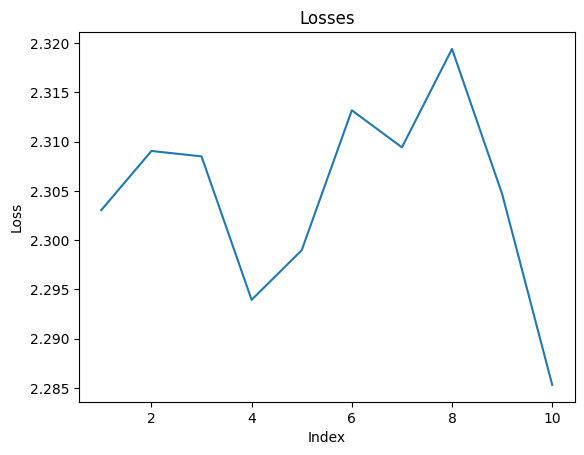


Test set: Average loss: 2.3043, Accuracy: 1028/10000 (10%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 2.290885
Train Epoch: 7 [6400/60000 (11%)]	Loss: 2.300545
Train Epoch: 7 [12800/60000 (21%)]	Loss: 2.289737
Train Epoch: 7 [19200/60000 (32%)]	Loss: 2.290359
Train Epoch: 7 [25600/60000 (43%)]	Loss: 2.304296
Train Epoch: 7 [32000/60000 (53%)]	Loss: 2.300463
Train Epoch: 7 [38400/60000 (64%)]	Loss: 2.317156
Train Epoch: 7 [44800/60000 (75%)]	Loss: 2.307958
Train Epoch: 7 [51200/60000 (85%)]	Loss: 2.301335
Train Epoch: 7 [57600/60000 (96%)]	Loss: 2.303908


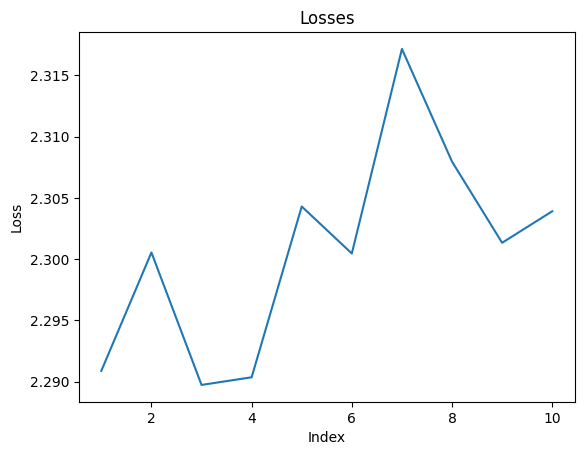


Test set: Average loss: 2.3022, Accuracy: 1028/10000 (10%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 2.303530
Train Epoch: 8 [6400/60000 (11%)]	Loss: 2.295226
Train Epoch: 8 [12800/60000 (21%)]	Loss: 2.307013
Train Epoch: 8 [19200/60000 (32%)]	Loss: 2.296721
Train Epoch: 8 [25600/60000 (43%)]	Loss: 2.329382
Train Epoch: 8 [32000/60000 (53%)]	Loss: 2.312155
Train Epoch: 8 [38400/60000 (64%)]	Loss: 2.299696
Train Epoch: 8 [44800/60000 (75%)]	Loss: 2.298547
Train Epoch: 8 [51200/60000 (85%)]	Loss: 2.294332
Train Epoch: 8 [57600/60000 (96%)]	Loss: 2.255533


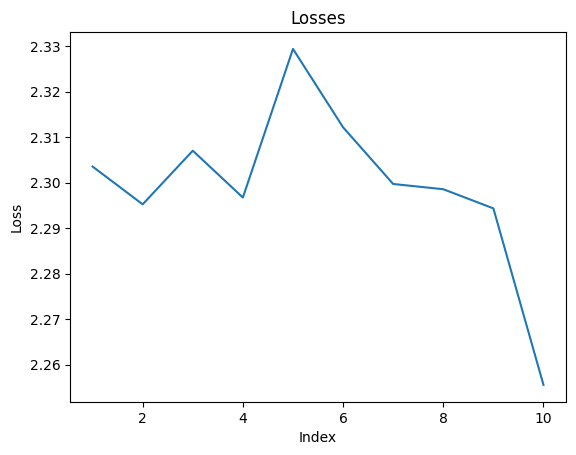


Test set: Average loss: 2.3025, Accuracy: 1009/10000 (10%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 2.297486
Train Epoch: 9 [6400/60000 (11%)]	Loss: 2.305094
Train Epoch: 9 [12800/60000 (21%)]	Loss: 2.295491
Train Epoch: 9 [19200/60000 (32%)]	Loss: 2.304513
Train Epoch: 9 [25600/60000 (43%)]	Loss: 2.321613
Train Epoch: 9 [32000/60000 (53%)]	Loss: 2.298161
Train Epoch: 9 [38400/60000 (64%)]	Loss: 2.304261
Train Epoch: 9 [44800/60000 (75%)]	Loss: 2.291250
Train Epoch: 9 [51200/60000 (85%)]	Loss: 2.300606
Train Epoch: 9 [57600/60000 (96%)]	Loss: 2.300756



Test set: Average loss: 2.3025, Accuracy: 1135/10000 (11%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 2.302378
Train Epoch: 10 [6400/60000 (11%)]	Loss: 2.304638
Train Epoch: 10 [12800/60000 (21%)]	Loss: 2.291374
Train Epoch: 10 [19200/60000 (32%)]	Loss: 2.294763
Train Epoch: 10 [25600/60000 (43%)]	Loss: 2.306124
Train Epoch: 10 [32000/60000 (53%)]	Loss: 2.294505
Train Epoch: 10 [38400/60000 (64%)]	Loss: 2.302977
Train Epoch: 10 [44800/60000 (75%)]	Loss: 2.304092
Train Epoch: 10 [51200/60000 (85%)]	Loss: 2.299148
Train Epoch: 10 [57600/60000 (96%)]	Loss: 2.317041


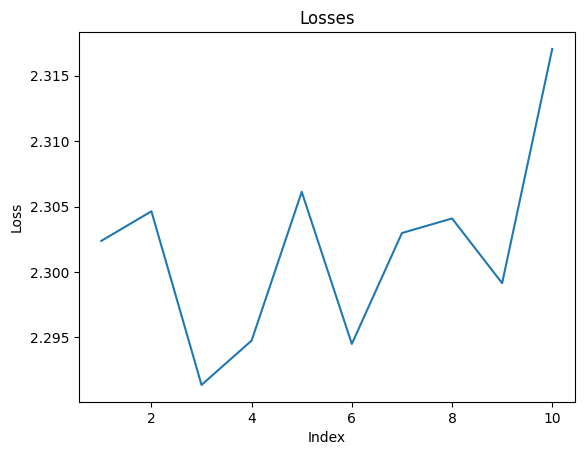


Test set: Average loss: 2.3040, Accuracy: 1135/10000 (11%)



In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_14().to(device)
    optimizer = optim.RMSprop(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_RMSProp_optimizer.pt')

if __name__ == '__main__':
    main()

**Define Class (Model with Adam Optimizer)**

In [ ]:
class Net_15(nn.Module):
    def __init__(self):
        super(Net_15, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299172
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.408486
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.242017
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.434755
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.176291
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.183025
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.166458
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.182821
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.194889
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.379567


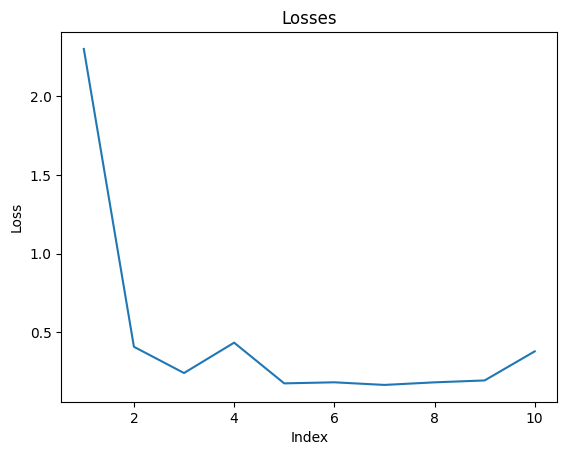


Test set: Average loss: 0.2203, Accuracy: 9327/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.453356
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.311052
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.240481
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.162942
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.096896
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.201009
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.184406
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.418927
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.233058
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.226476



Test set: Average loss: 0.1949, Accuracy: 9369/10000 (94%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.298179
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.167734
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.502120
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.475565
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.185137
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.358711
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.198984
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.187302
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.069559
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.258629


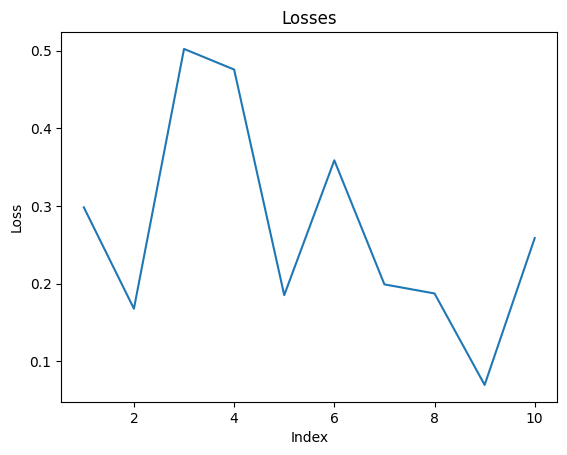


Test set: Average loss: 0.2072, Accuracy: 9343/10000 (93%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.066842
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.080191
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.413255
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.162384
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.308872
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.043498
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.057491
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.219560
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.096168
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.086907


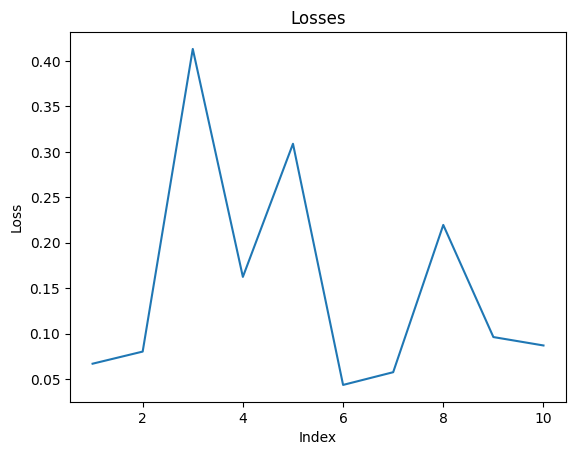


Test set: Average loss: 0.1681, Accuracy: 9515/10000 (95%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.064318
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.201219
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.399982
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.226169
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.114427
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.195015
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.334423
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.171054
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.112067
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.301023


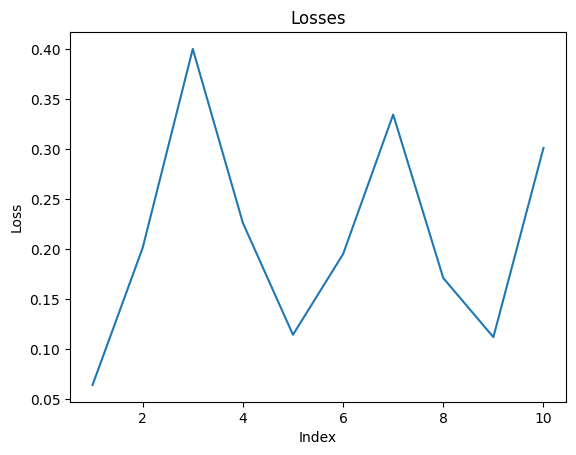


Test set: Average loss: 0.1720, Accuracy: 9498/10000 (95%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.250011
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.180429
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.325127
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.183596
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.060622
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.075773
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.097334
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.107522
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.145954
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.100335


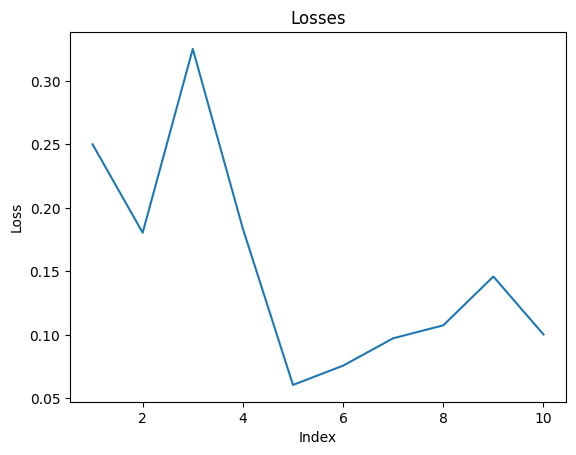


Test set: Average loss: 0.1697, Accuracy: 9506/10000 (95%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.260756
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.306943
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.087527
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.243740
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.188346
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.190042
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.320853
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.269273
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.309689
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.072790


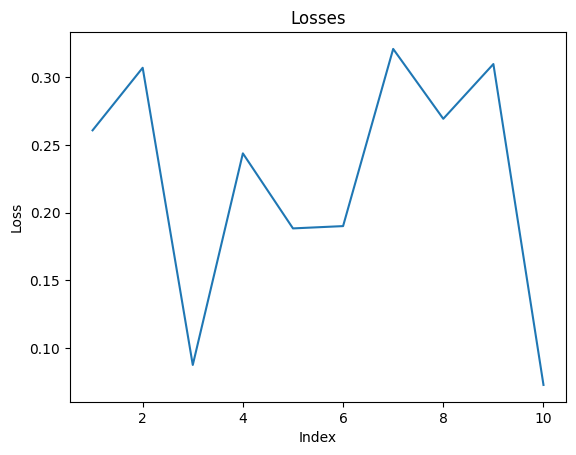


Test set: Average loss: 0.1754, Accuracy: 9489/10000 (95%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.105126
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.151191
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.065957
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.049843
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.356821
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.084943
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.084964
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.163670
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.015578
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.052919



Test set: Average loss: 0.2159, Accuracy: 9395/10000 (94%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.076988
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.178855
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.259247
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.064950
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.235735
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.179265
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.086044
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.362558
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.104147
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.204679


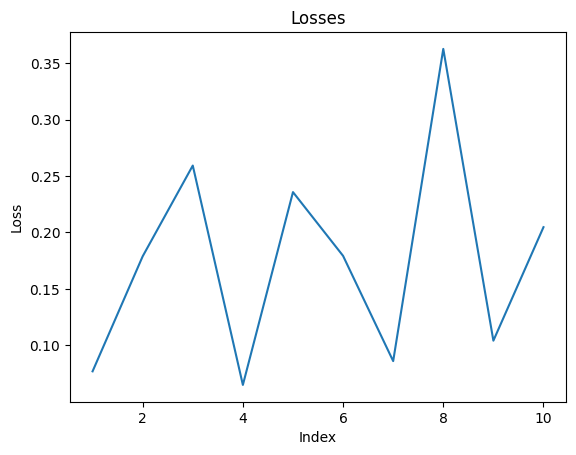


Test set: Average loss: 0.2196, Accuracy: 9441/10000 (94%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.153408
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.066434
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.123962
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.082093
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.212672
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.251142
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.304748
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.390768
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.079277
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.136539



Test set: Average loss: 0.1584, Accuracy: 9530/10000 (95%)



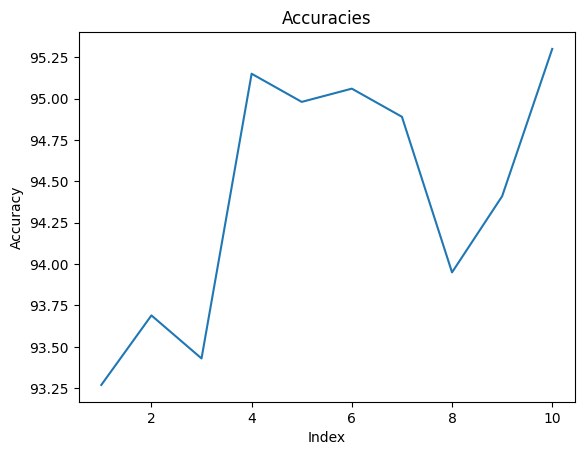

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_15().to(device)
    optimizer = optim.Adam(model.parameters(), lr=args.lr)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_Adam_optimizer.pt')

if __name__ == '__main__':
    main()

# **Adding the third Convolutional Layer in the Model**

**Define Class**

In [ ]:
class Net_16(nn.Module):
    def __init__(self):
        super(Net_16, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.conv3 = nn.Conv2d(50, 100, 3, 1)
        self.fc1 = nn.Linear(1*1*100, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 1*1*100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Accuracies**

In [ ]:
accuracies = []

**Main**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320248
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.055560
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.544860
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.378901
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.391262
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.201405
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.143380
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.113993
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.079479
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.082167


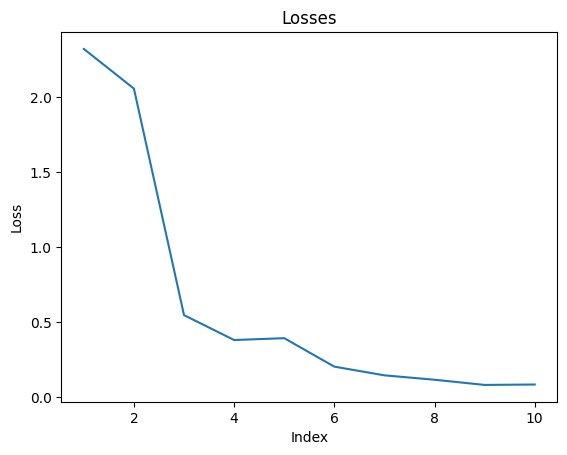


Test set: Average loss: 0.1318, Accuracy: 9571/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.106464
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.056774
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.159222
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.182773
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.047173
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.293162
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.060137
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.136800
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.020824
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.116011


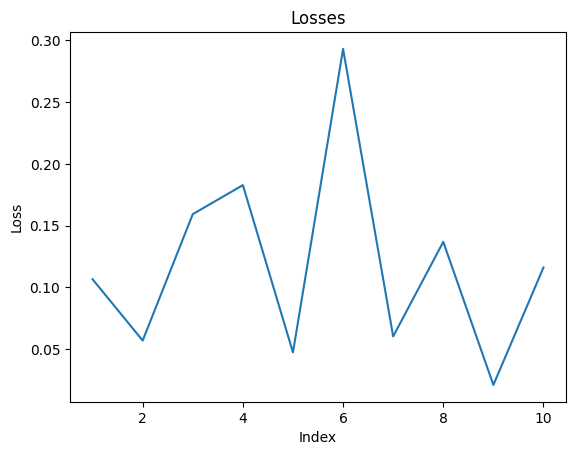


Test set: Average loss: 0.0660, Accuracy: 9780/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.039995
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.006827
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.116011
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.076535
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.026453
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.071549
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.123834
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.080820
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.010570
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.079735


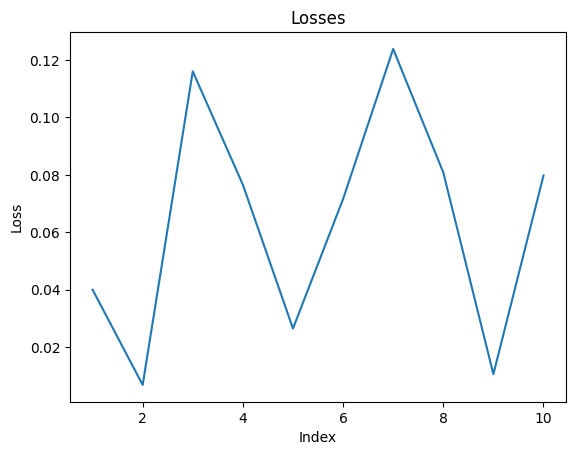


Test set: Average loss: 0.0741, Accuracy: 9765/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.036826
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.076417
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.160160
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.051985
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.080529
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.082629
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.056178
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.027965
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.139077
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.007306


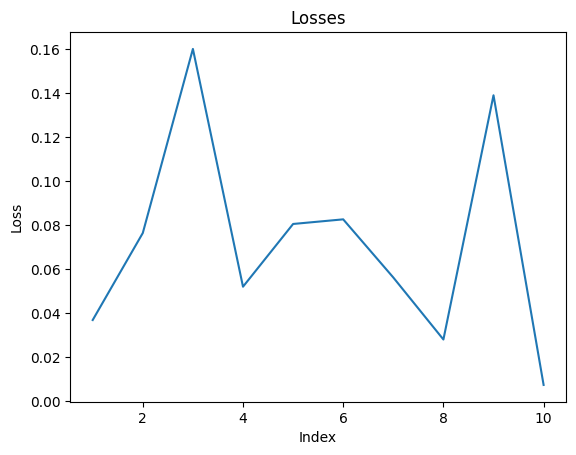


Test set: Average loss: 0.0438, Accuracy: 9867/10000 (99%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.025045
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.005312
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.025353
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.010899
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.012132
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.037784
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.014694
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.139571
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.043043
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.008812


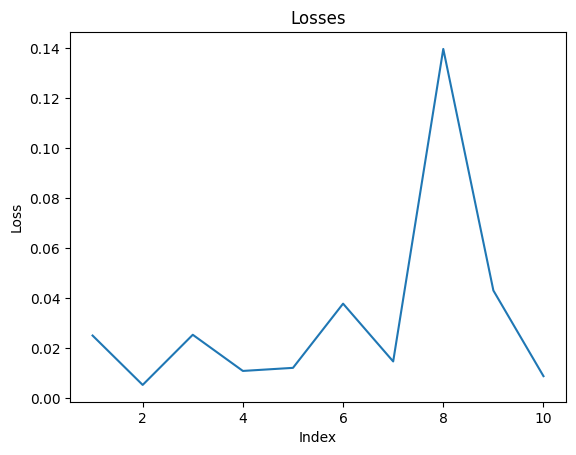


Test set: Average loss: 0.0402, Accuracy: 9869/10000 (99%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.019327
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.073869
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.018360
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.012308
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.003272
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.008553
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.026603
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.008575
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.009413
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.034202


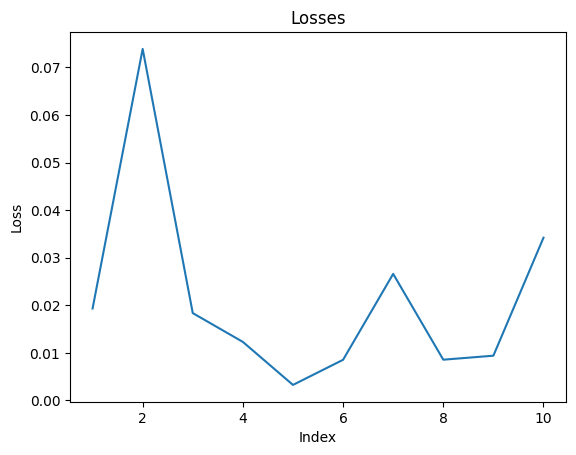


Test set: Average loss: 0.0401, Accuracy: 9872/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.028258
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.018030
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.055722
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.010897
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.006766
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.002113
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.002732
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.056983
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.066137
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.022411


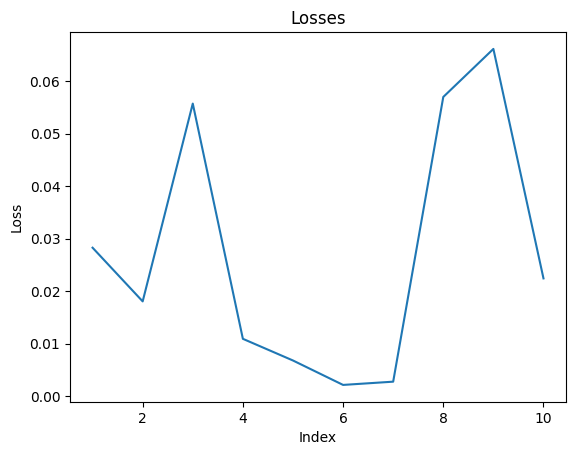


Test set: Average loss: 0.0392, Accuracy: 9877/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.014115
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.012832
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.036897
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.055434
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.020511
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.012799
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.002970
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.007756
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.051608
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.048414


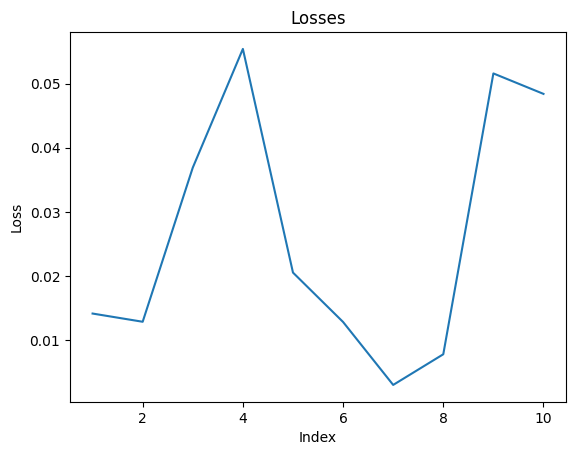


Test set: Average loss: 0.0325, Accuracy: 9888/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.159563
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.030767
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.009202
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.000726
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.001772
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.006876
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.073686
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.004159
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.001064
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.007959


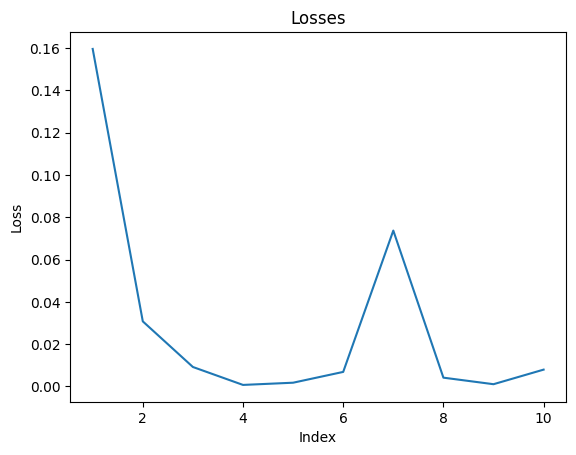


Test set: Average loss: 0.0300, Accuracy: 9903/10000 (99%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.003313
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.008174
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.047320
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.011644
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.003370
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.039937
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.003181
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.013118
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.005780
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.019755


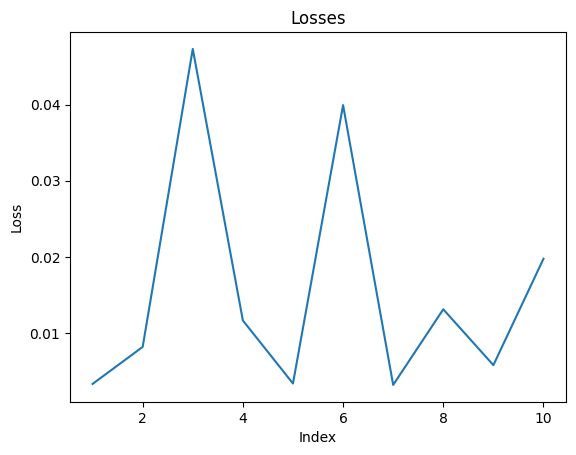


Test set: Average loss: 0.0276, Accuracy: 9903/10000 (99%)



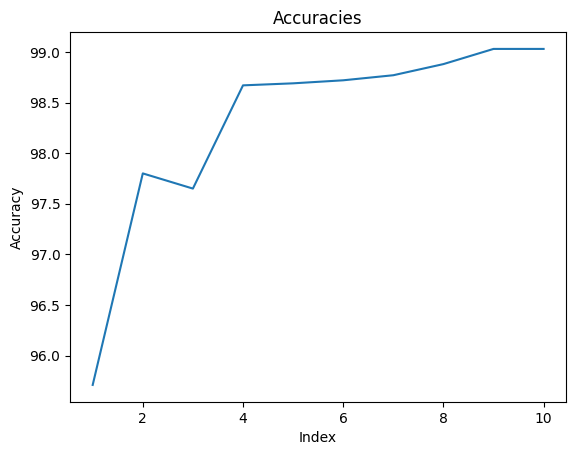

In [ ]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=True,
                        help='For Saving the current Model')
    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net_16().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    x_values = list(range(1, args.epochs + 1))

    plt.plot(x_values, accuracies)
    plt.xlabel('Index')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    if (args.save_model):
        torch.save(model.state_dict(),'/content/drive/MyDrive/MNIST_CNN/mnist_cnn_3_conv_layers.pt')

if __name__ == '__main__':
    main()